In [1]:
import io
import numpy as np

def load_vec(emb_path, nmax=500000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

### Load NRC Data

In [8]:
PATH = '.\\NRC Data\\NRC-Sentiment-Emotion-Lexicons\\NRC-Sentiment-Emotion-Lexicons\\NRC-Emotion-Lexicon-v0.92\\'

f = open(PATH+'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r')
word_list = []

temp = f.readlines()
for m in temp:
    m = m.replace('\n','')
    t = m.split('\t')
    word_list.append(t)
    
print(word_list[:4])

[['aback', 'anger', '0'], ['aback', 'anticipation', '0'], ['aback', 'disgust', '0'], ['aback', 'fear', '0']]


In [9]:
import pandas as pd

headers = ['word','sentiment','score']
df = pd.DataFrame(word_list, columns=headers)
df = df[df.score=='1']
df = df[['word','sentiment']]
df.head()

,word,sentiment
19,abacus,trust
23,abandon,fear
25,abandon,negative
27,abandon,sadness
30,abandoned,anger


In [10]:
anger_list = df[df.sentiment=='anger'].word.values.tolist()
trust_list = df[df.sentiment=='trust'].word.values.tolist()
surprise_list = df[df.sentiment=='surprise'].word.values.tolist()
sadness_list = df[df.sentiment=='sadness'].word.values.tolist()
negative_list = df[df.sentiment=='negative'].word.values.tolist()
positive_list = df[df.sentiment=='positive'].word.values.tolist()
joy_list = df[df.sentiment=='joy'].word.values.tolist()
fear_list = df[df.sentiment=='fear'].word.values.tolist()
disgust_list = df[df.sentiment=='disgust'].word.values.tolist()
anticipation_list = df[df.sentiment=='anticipation'].word.values.tolist()

In [11]:
association_dict = {}

In [12]:
association_dict['anger'] = anger_list
association_dict['trust'] = trust_list
association_dict['surprise'] = surprise_list
association_dict['sadness'] = sadness_list
association_dict['negative'] = negative_list
association_dict['positive'] = positive_list
association_dict['joy'] = joy_list
association_dict['fear'] = fear_list
association_dict['disgust'] = disgust_list
association_dict['anticipation'] = anticipation_list

### Load LIWC Data

In [13]:
import os

PATH = '.\LIWC Data\\'

results = []
j = 0
for root, dirs, files in os.walk(PATH):
    print(root)
    for i,name in enumerate(files):
        temp = []
        if name.endswith((".txt")):
            print(name.replace('.txt', ''))
            f = open(PATH + name, 'r')
            word_list = []

            temp = f.readlines()
            for m in temp:
                m = m.replace('\n','').replace(' ','').replace('*','')
                m = m.lower()
                word_list.append(m)

            association_dict[name.replace('.txt', '')] = word_list

.\LIWC Data\
adjective
death
family
female
future
intero
male
money
motion
past
present
pronoun
relig
time
verb


In [14]:
association_dict.keys()

dict_keys(['anger', 'trust', 'surprise', 'sadness', 'negative', 'positive', 'joy', 'fear', 'disgust', 'anticipation', 'adjective', 'death', 'family', 'female', 'future', 'intero', 'male', 'money', 'motion', 'past', 'present', 'pronoun', 'relig', 'time', 'verb'])

In [9]:
import os
import pandas as pd
from collections import Counter
from sklearn.metrics import mean_squared_error            
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

### Load bok name, genre and outcome

In [10]:
PATH = '..\\Emotion Flow GitHub\\data_all\\'

results = []
j = 0
for root, dirs, files in os.walk(PATH):
    print(root)
    for i,name in enumerate(files):
        temp = []
        if name.endswith((".vec")):
            if 'filtered' in name:
                continue
            if 'mapped' in name:
                continue
            
            genere = (root.split("\\"))[3]
            outcome = (root.split("\\"))[4]
            
            temp.append(name)
            temp.append(genere)
            temp.append(outcome)
            results.append(temp)
            
headers = ['name','genre','outcome']#,'dist_pos_avg','dist_pos_cen','dist_neg_avg','dist_neg_cen']
df_book = pd.DataFrame(results, columns=headers)

..\Emotion Flow GitHub\data_all\
..\Emotion Flow GitHub\data_all\Detective_and_mystery_stories
..\Emotion Flow GitHub\data_all\Detective_and_mystery_stories\failure
..\Emotion Flow GitHub\data_all\Detective_and_mystery_stories\success
..\Emotion Flow GitHub\data_all\Drama
..\Emotion Flow GitHub\data_all\Drama\failure
..\Emotion Flow GitHub\data_all\Drama\success
..\Emotion Flow GitHub\data_all\Fiction
..\Emotion Flow GitHub\data_all\Fiction\failure
..\Emotion Flow GitHub\data_all\Fiction\success
..\Emotion Flow GitHub\data_all\Historical_fiction
..\Emotion Flow GitHub\data_all\Historical_fiction\failure
..\Emotion Flow GitHub\data_all\Historical_fiction\success
..\Emotion Flow GitHub\data_all\Love_stories
..\Emotion Flow GitHub\data_all\Love_stories\failure
..\Emotion Flow GitHub\data_all\Love_stories\success
..\Emotion Flow GitHub\data_all\Poetry
..\Emotion Flow GitHub\data_all\Poetry\failure
..\Emotion Flow GitHub\data_all\Poetry\success
..\Emotion Flow GitHub\data_all\Science_fictio

In [11]:
print(len(df_book))
df_book.head()

1003


,name,genre,outcome
0,10082_the+hampstead+mystery.vec,Detective_and_mystery_stories,failure
1,10083_the+house+of+the+whispering+pines.vec,Detective_and_mystery_stories,failure
2,10371_the+cinema+murder.vec,Detective_and_mystery_stories,failure
3,10534_the+double+traitor.vec,Detective_and_mystery_stories,failure
4,10943_elusive+isabel.vec,Detective_and_mystery_stories,failure


In [12]:
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

In [13]:
from scipy.spatial import distance

def dist_euc(X, Y):
    temp = []
    if X.shape==():
        return np.NAN
    
    for i, x in enumerate(X):
        y = Y[i]
        d = distance.euclidean(x,y)
        temp.append(d)
    return np.mean(temp)

#### Function to calculate the pair-wise distance of words for every concepts in the aligned embedding space

In [14]:
def generate_score(row):
    name = row[0]
    genre = row[1]
    outcome = row[2]
    name = name[:-4]
    #print(name)
    PATH = '..\\Emotion Flow GitHub\\data_all\\'
    root = PATH + genre + '\\' + outcome
    #print(path)
    
    source_path =  root + "\\" +name + "_mapped.vec"
    #print(source_path)
    if os.path.exists(source_path):
        with open(source_path, 'rb') as f:
            try:
               # do stuff
                a = 1
            except : # whatever reader errors you care about
                print(source_path)
                return 
            
    source_embed,temp_id2word,temp_word2id= load_vec(source_path)
    
    target_path = root + "\\" +name + "_filtered_mapped.vec"
    #print(target_path)
    target_embed,init_id2word,init_word2id= load_vec(target_path)
    
    source_vec = []
    target_vec = []
    source_id2word = {}
    source_word2id = {}
    target_id2word = {}
    target_word2id ={}
    ind = 0
#     print('len')
#     print(len(source_embed))
#     print(len(target_embed))
    
    for i,w in enumerate(init_word2id.keys()):
        if w in temp_word2id:
            source_ind = temp_word2id[w]
            source_vec.append(source_embed[source_ind])
            source_id2word[ind] = w
            source_word2id[w] = ind

            target_ind = init_word2id[w]
            target_vec.append(target_embed[target_ind])
            target_id2word[ind] = w
            target_word2id[w] = ind
            ind += 1

    based_vec,other_vec = source_vec,target_vec

    all_book_vec = []
    all_base_vec = []
    all_dist = []
    
    global active_list
    for w in association_dict[active_list]:
        if w in target_word2id and w in source_word2id:
            #print(w)
            book_vec_ = other_vec[target_word2id[w]]
            base_vec_ = based_vec[source_word2id[w]]
            
            dist = distance.euclidean(book_vec_, base_vec_)
            all_dist.append(dist)
            #all_book_vec.append(book_vec_)
            #all_base_vec.append(base_vec_)

    #avg_book_vec = np.average(all_book_vec, axis= 0)
    #avg_base_vec = np.average(all_base_vec, axis =0)
    #print(avg_book_vec.shape)
    #print(avg_base_vec.shape)
    #dist_avg = dist_euc(avg_book_vec, avg_base_vec)
    #print(avg_book_vec)
    #print(avg_base_vec)
    #print(dist_avg)
    #print(len(all_dist))
    dist_cen = np.average(all_dist)
    
    return dist_cen

In [15]:
LIST = association_dict.keys()

global active_list

for l in LIST:
    global active_list
    active_list = l
    print(l)
    df_book[l] = df_book.progress_apply(generate_score, axis=1)

anger


C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



trust



surprise



sadness



negative



positive



joy



fear



disgust



anticipation



adjective



death



family



female



future



intero



male



money



motion



past



present



pronoun



relig



time



verb


#### Function to generate the over all distance

In [16]:
def generate_score_all(row):
    name = row[0]
    genre = row[1]
    outcome = row[2]
    name = name[:-4]
    #print(name)
    PATH = '..\\Emotion Flow GitHub\\data_all\\'
    root = PATH + genre + '\\' + outcome
    #print(path)
    
    try:
        source_path =  root + "\\" +name + "_mapped.vec"
        #print(source_path)
        source_embed,temp_id2word,temp_word2id= load_vec(source_path)

        target_path = root + "\\" +name + "_filtered_mapped.vec"
        #print(target_path)
        target_embed,init_id2word,init_word2id= load_vec(target_path)

        source_vec = []
        target_vec = []
        source_id2word = {}
        source_word2id = {}
        target_id2word = {}
        target_word2id ={}
        ind = 0
    #     print('len')
    #     print(len(source_embed))
    #     print(len(target_embed))

        for i,w in enumerate(init_word2id.keys()):
            if w in temp_word2id:
                source_ind = temp_word2id[w]
                source_vec.append(source_embed[source_ind])
                source_id2word[ind] = w
                source_word2id[w] = ind

                target_ind = init_word2id[w]
                target_vec.append(target_embed[target_ind])
                target_id2word[ind] = w
                target_word2id[w] = ind
                ind += 1

        based_vec,other_vec = source_vec,target_vec

        all_book_vec = []
        all_base_vec = []
        all_dist = []

        for w in target_word2id.keys():
            book_vec_ = other_vec[target_word2id[w]]
            base_vec_ = based_vec[source_word2id[w]]

            dist = distance.euclidean(book_vec_, base_vec_)
            all_dist.append(dist)

        dist_cen = np.average(all_dist)
        return dist_cen

    except FileNotFoundError:
        print(root + "\\" +name)
        return np.NaN

In [17]:
df_book['dist'] = df_book.progress_apply(generate_score_all, axis=1)

### The feature vector

In [18]:
df_book.head()

,name,genre,outcome,anger,trust,surprise,sadness,negative,positive,joy,...,male,money,motion,past,present,pronoun,relig,time,verb,dist
0,10082_the+hampstead+mystery.vec,Detective_and_mystery_stories,failure,0.928524,0.918744,0.929020,0.917572,0.925656,0.918969,0.914599,...,0.939654,0.930497,0.923865,0.914525,0.920689,0.897278,0.890290,0.930880,0.929682,0.918614
1,10083_the+house+of+the+whispering+pines.vec,Detective_and_mystery_stories,failure,0.928995,0.919103,0.913978,0.922291,0.927324,0.916676,0.905140,...,0.972327,0.928902,0.906096,0.909494,0.912471,0.929677,0.895544,0.918517,0.906980,0.914470
2,10371_the+cinema+murder.vec,Detective_and_mystery_stories,failure,0.954635,0.949335,0.965495,0.949954,0.952701,0.955515,0.952161,...,0.962402,0.907652,0.924624,0.936541,0.936847,0.958892,0.968760,0.969123,0.931426,0.947109
3,10534_the+double+traitor.vec,Detective_and_mystery_stories,failure,0.961841,0.961074,0.950450,0.966016,0.967095,0.959137,0.959231,...,0.995888,0.957394,0.984359,0.942735,0.970269,0.995306,0.991014,0.960271,0.970269,0.961499
4,10943_elusive+isabel.vec,Detective_and_mystery_stories,failure,1.028234,0.995729,1.015424,1.012126,1.016306,0.996695,1.000139,...,1.030985,1.014924,1.002031,0.966512,0.978782,0.982749,0.993544,1.013652,0.986591,0.997344


In [19]:
df_book.describe()

,anger,trust,surprise,sadness,negative,positive,joy,fear,disgust,anticipation,...,male,money,motion,past,present,pronoun,relig,time,verb,dist
count,9.990000e+02,1.003000e+03,9.990000e+02,1.000000e+03,1.001000e+03,1.003000e+03,1.002000e+03,1.000000e+03,9.980000e+02,1.002000e+03,...,1.001000e+03,9.550000e+02,9.990000e+02,1.002000e+03,1.002000e+03,1.003000e+03,9.110000e+02,1.003000e+03,1.003000e+03,1.003000e+03
mean,3.110370e+09,3.325650e+09,2.298876e+09,2.338091e+09,2.954671e+09,2.910390e+09,3.330745e+09,2.835575e+09,3.531497e+09,3.351075e+09,...,3.157118e+09,1.971063e+09,2.369407e+09,3.070615e+09,3.177924e+09,3.368526e+09,3.705290e+08,3.457075e+09,2.946887e+09,3.258802e+09
std,3.785184e+10,3.263995e+10,2.696189e+10,2.035513e+10,3.032517e+10,2.572458e+10,3.458412e+10,3.216650e+10,4.860194e+10,3.390148e+10,...,2.482523e+10,2.429118e+10,2.005687e+10,2.778785e+10,2.891614e+10,3.253134e+10,4.289661e+09,3.267250e+10,2.593487e+10,2.998425e+10
min,7.809831e-01,7.744696e-01,7.840148e-01,7.795850e-01,7.861460e-01,7.799992e-01,7.799607e-01,7.808738e-01,7.837783e-01,7.836821e-01,...,7.633994e-01,7.752871e-01,7.823800e-01,7.782224e-01,7.941112e-01,7.494568e-01,7.665159e-01,7.644248e-01,7.818330e-01,7.788009e-01
25%,9.483483e-01,9.378626e-01,9.419555e-01,9.455281e-01,9.451129e-01,9.383766e-01,9.402049e-01,9.479212e-01,9.465617e-01,9.424703e-01,...,9.433579e-01,9.448952e-01,9.331360e-01,9.306480e-01,9.348948e-01,9.410256e-01,9.387451e-01,9.466368e-01,9.359608e-01,9.379475e-01
50%,1.010870e+00,1.000457e+00,1.003150e+00,1.006277e+00,1.006570e+00,1.002143e+00,1.004858e+00,1.008557e+00,1.006821e+00,1.005633e+00,...,1.009810e+00,1.004350e+00,1.002348e+00,9.802400e-01,9.881938e-01,9.940413e-01,9.916241e-01,1.008680e+00,9.918764e-01,9.994367e-01
75%,1.132753e+00,1.125923e+00,1.126037e+00,1.134291e+00,1.134715e+00,1.127293e+00,1.123218e+00,1.127926e+00,1.131046e+00,1.124216e+00,...,1.134483e+00,1.115005e+00,1.119291e+00,1.112034e+00,1.077852e+00,1.094339e+00,1.093430e+00,1.138847e+00,1.103321e+00,1.121975e+00
max,8.806300e+11,6.979948e+11,8.110806e+11,5.297397e+11,7.419716e+11,4.596032e+11,8.235043e+11,9.098844e+11,1.123065e+12,8.177681e+11,...,3.898259e+11,5.696865e+11,5.037149e+11,5.601715e+11,6.223324e+11,6.810765e+11,7.886924e+10,8.247284e+11,5.909389e+11,6.914839e+11


In [20]:
len(df_book[(df_book.adjective>=100)])

56

In [21]:
df_filtered = df_book[(df_book.adjective<100)]

In [22]:
import seaborn as sns

sns.distplot(df_filtered.dist)

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


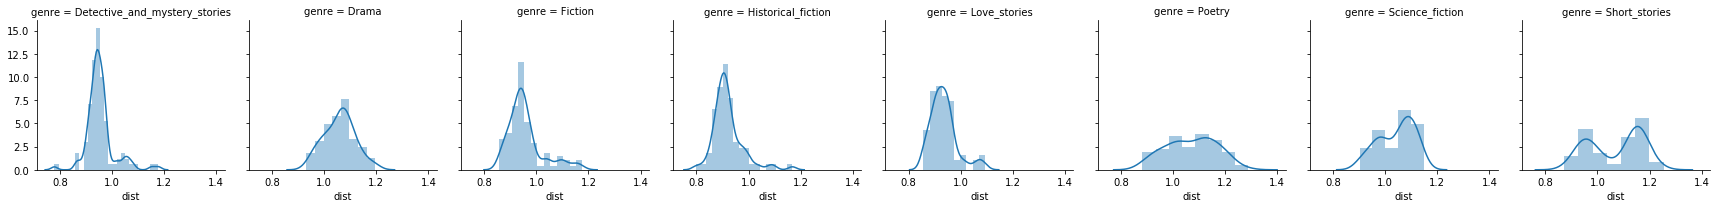

In [23]:
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
g = sns.FacetGrid(df_filtered, col="genre") 
g.map(sns.distplot, "dist")

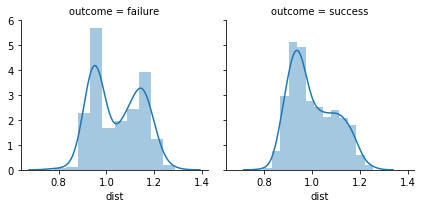

In [24]:
import seaborn as sns

g = sns.FacetGrid(df_filtered, col="outcome") 
g.map(sns.distplot, "dist")

(0.8, 1.1)

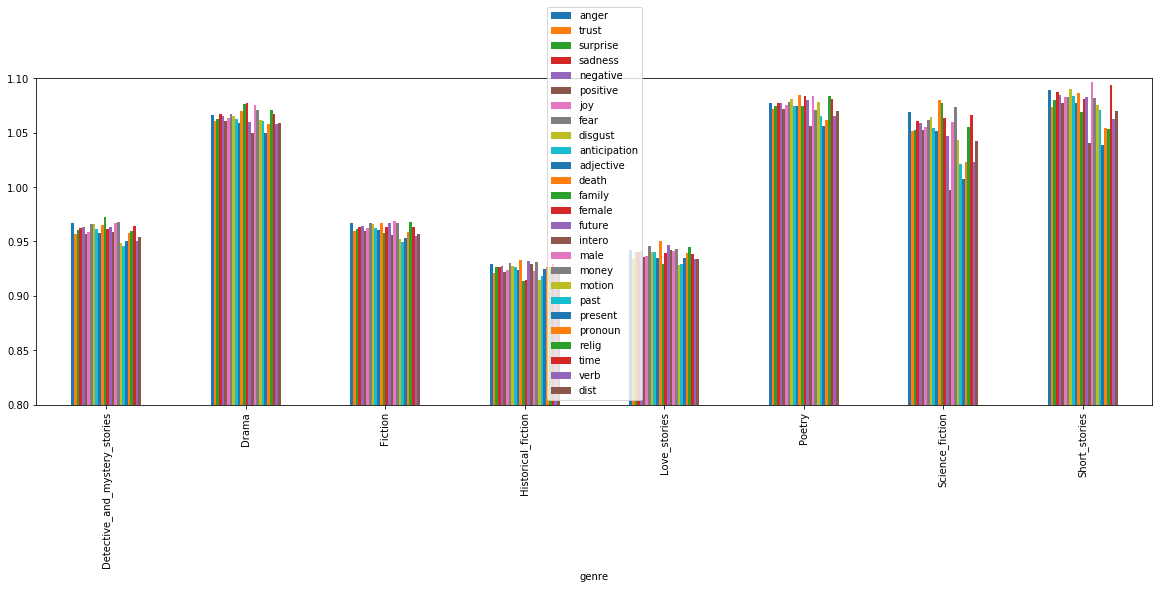

In [25]:
ax = df_filtered.groupby(['genre']).mean().plot(kind='bar', figsize=(20,6))
ax.set_ylim(0.8,1.10)

(0.95, 1.1)

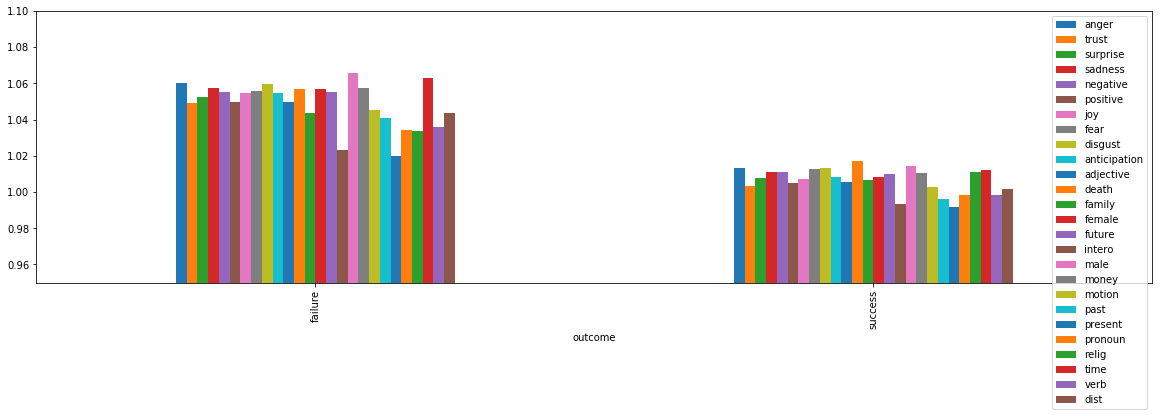

In [26]:
ax = df_filtered.groupby(['outcome']).mean().plot(kind='bar', figsize=(20,5))
ax.set_ylim(0.95,1.10)

In [ ]:
list(association_dict.keys())

#### Plot of distribution of the distance for differnt concept in every genre

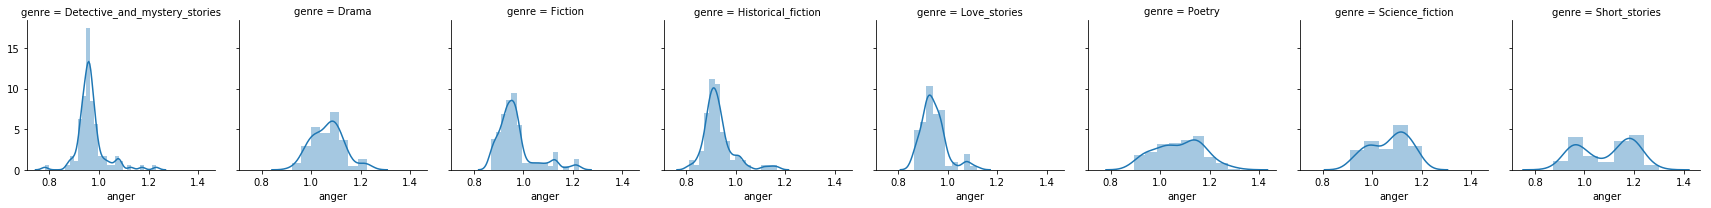

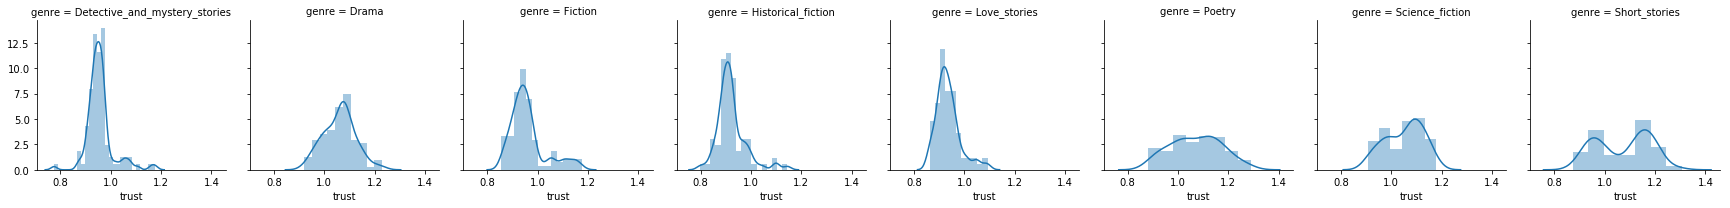

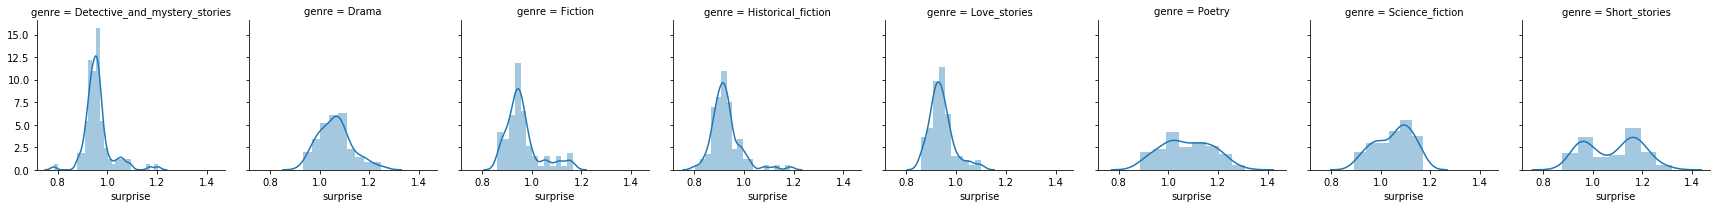

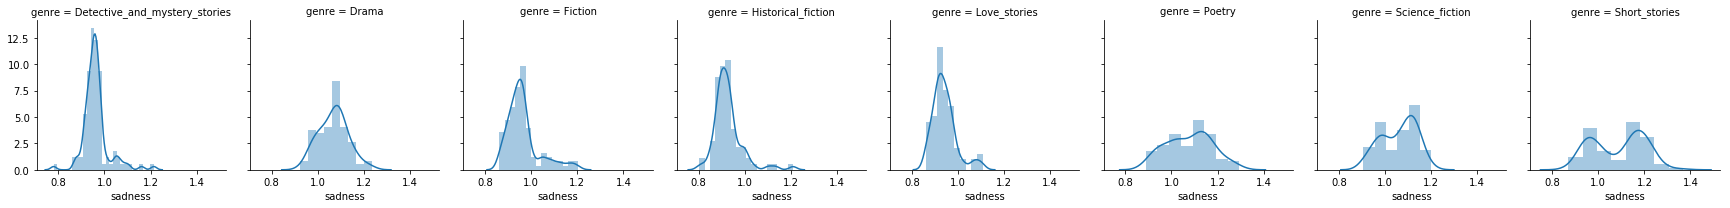

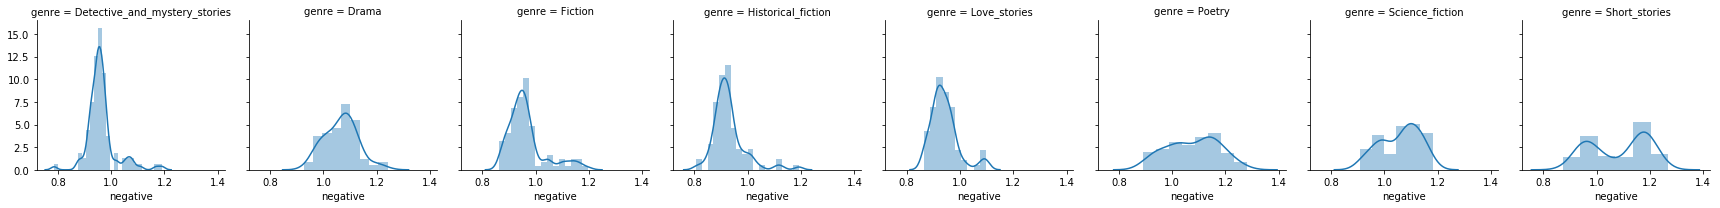

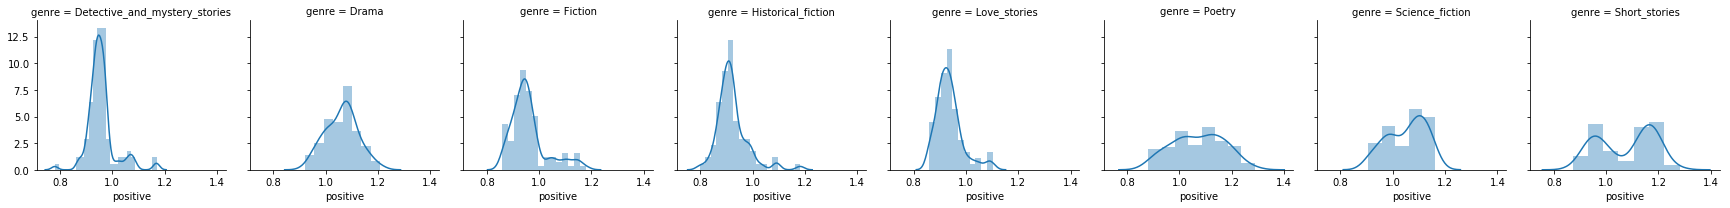

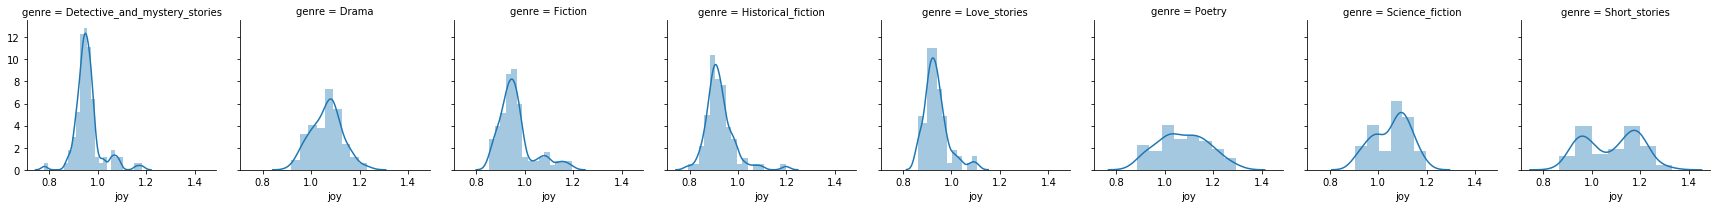

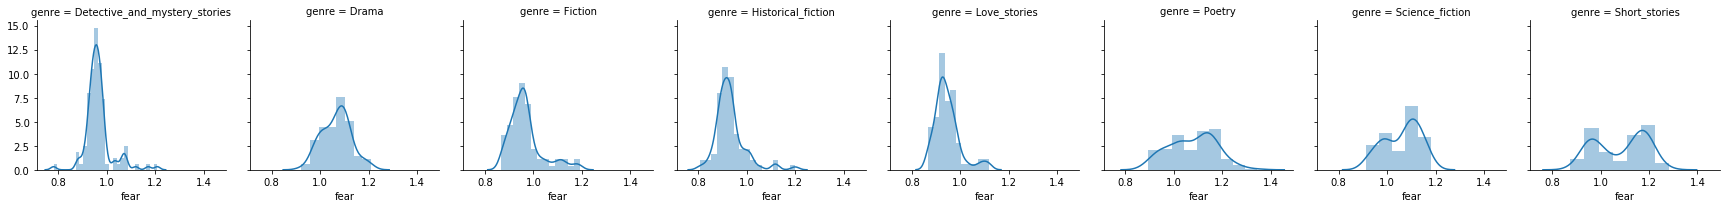

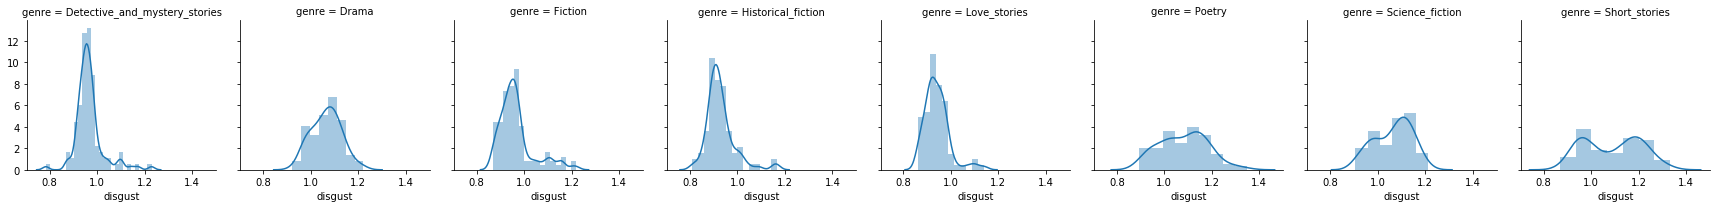

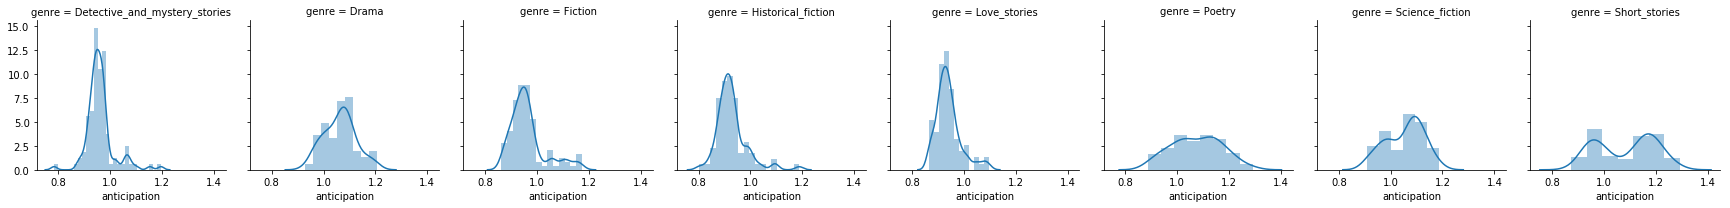

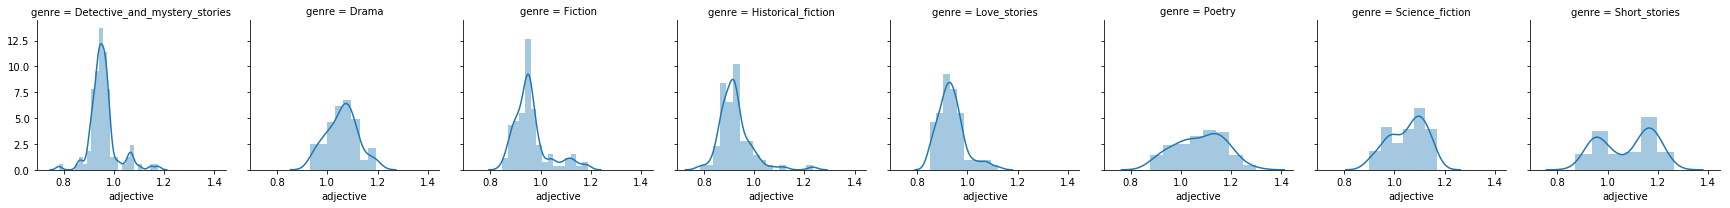

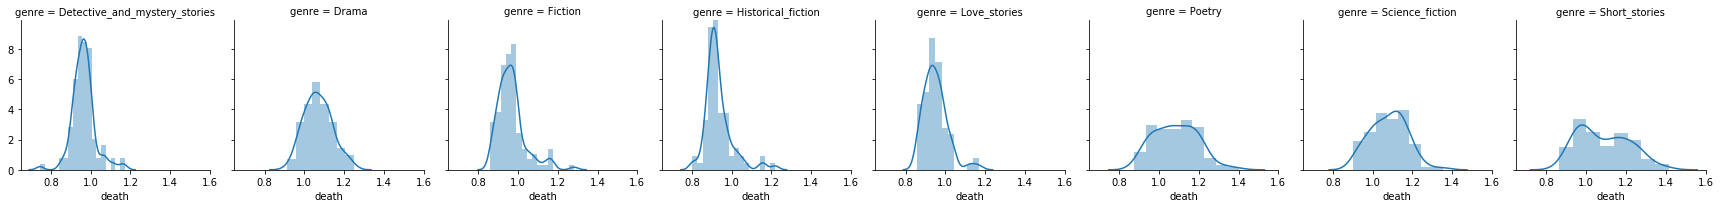

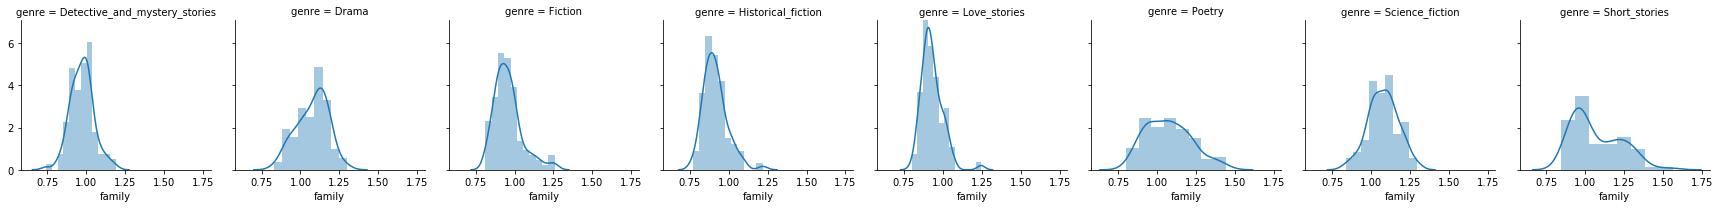

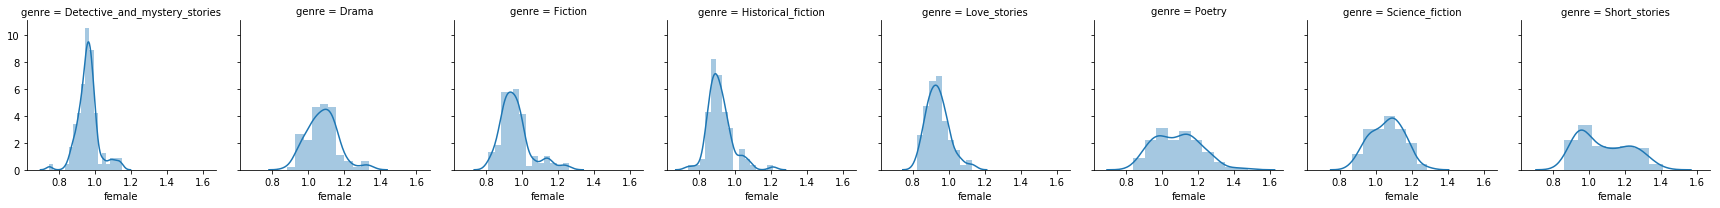

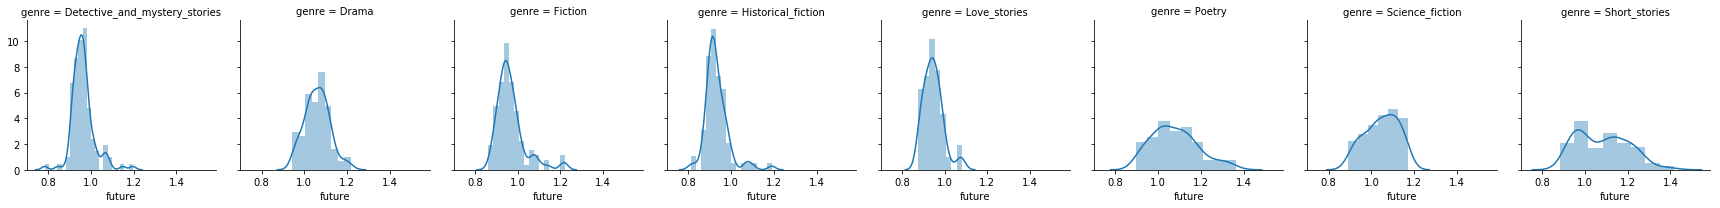

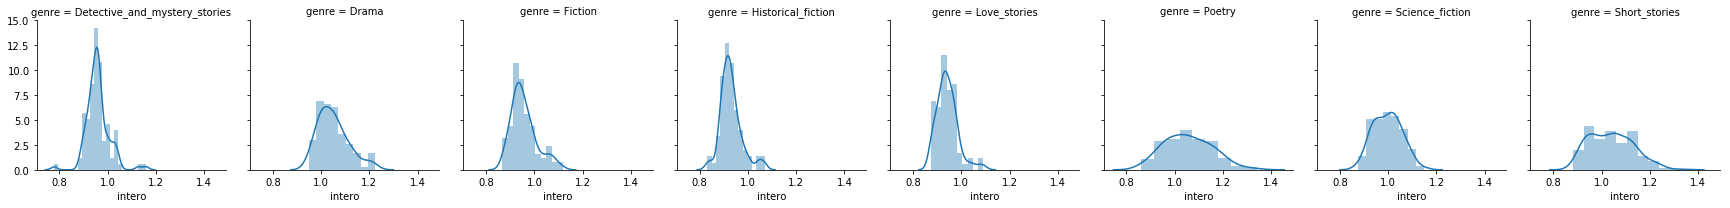

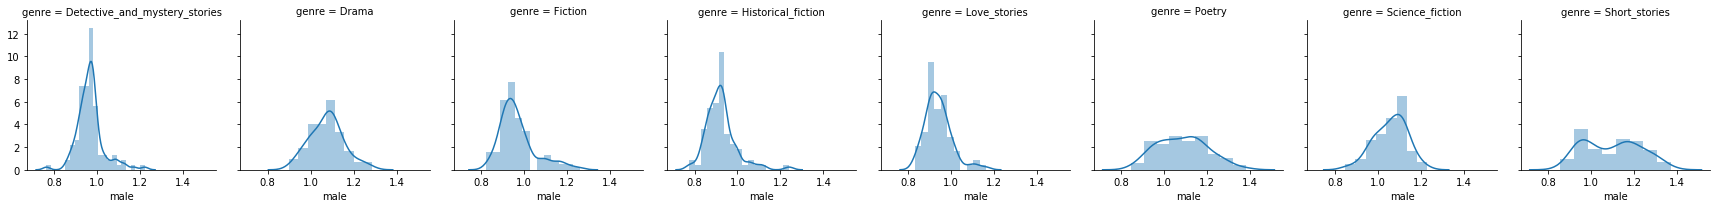

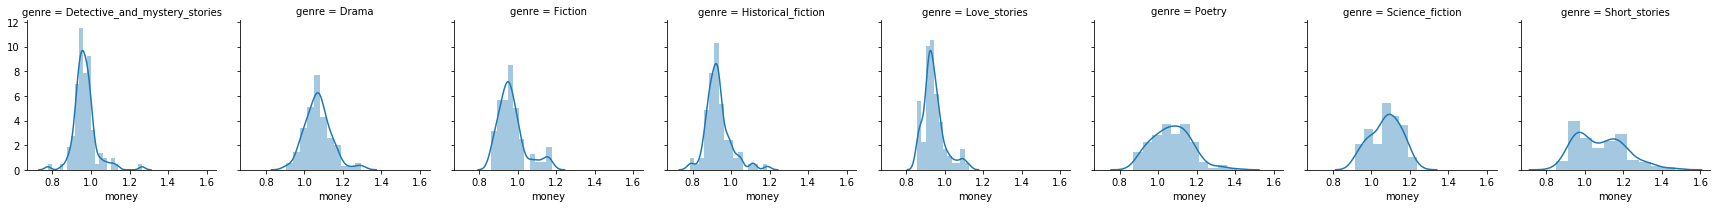

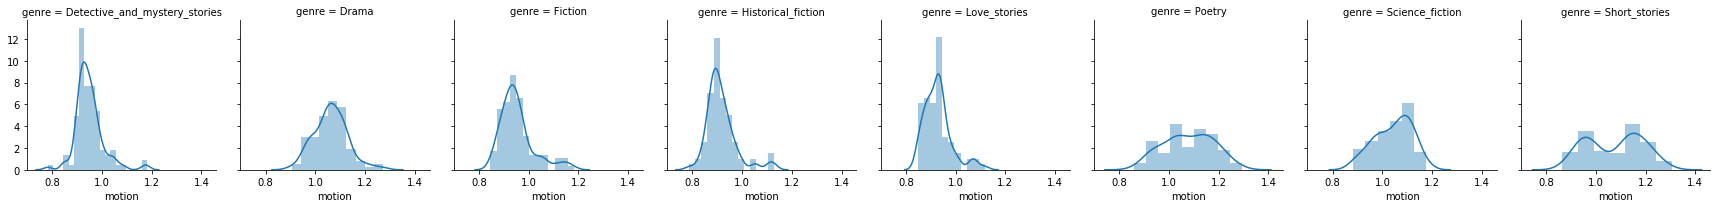

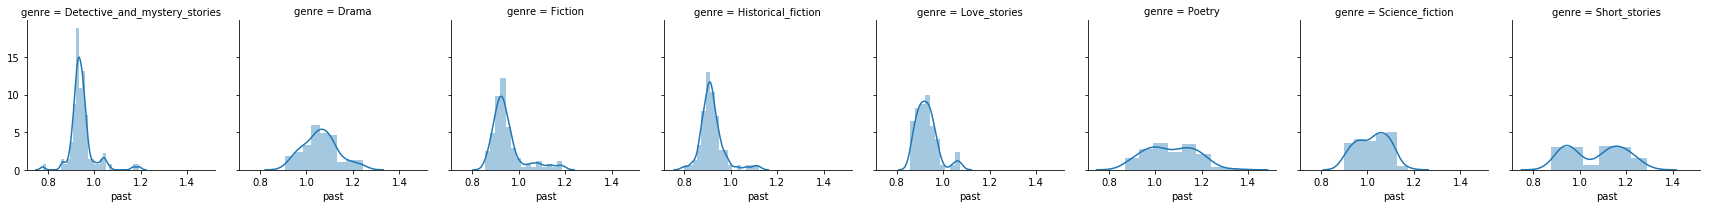

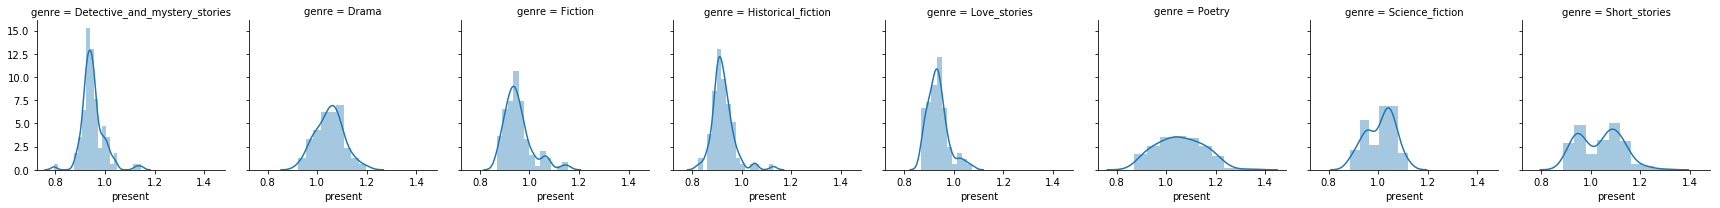

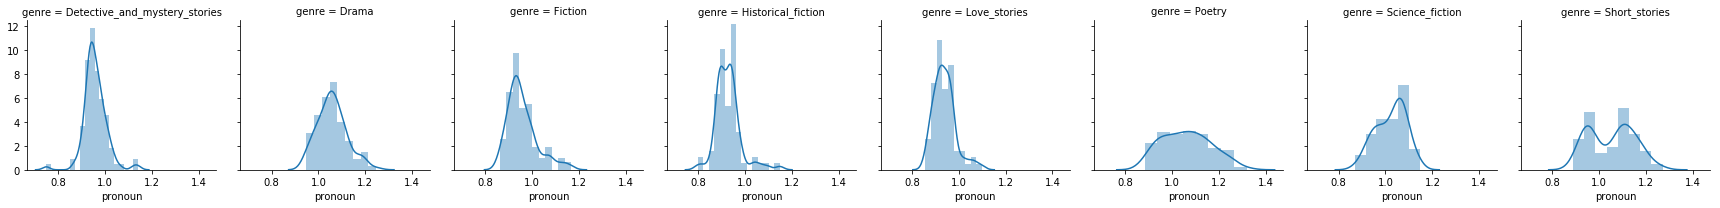

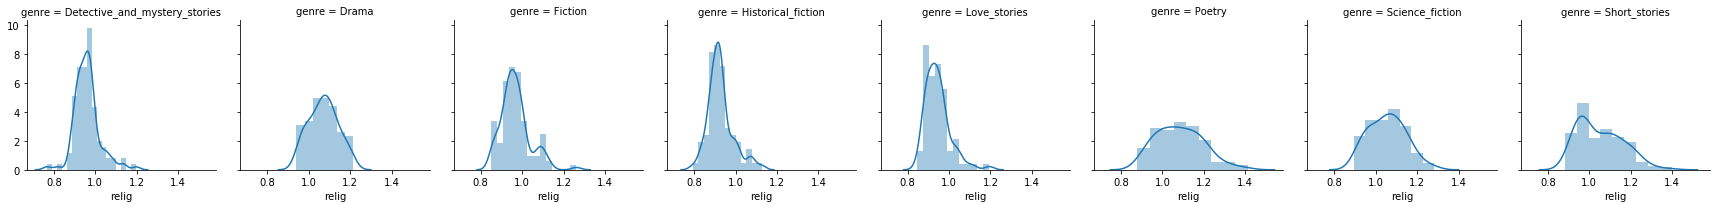

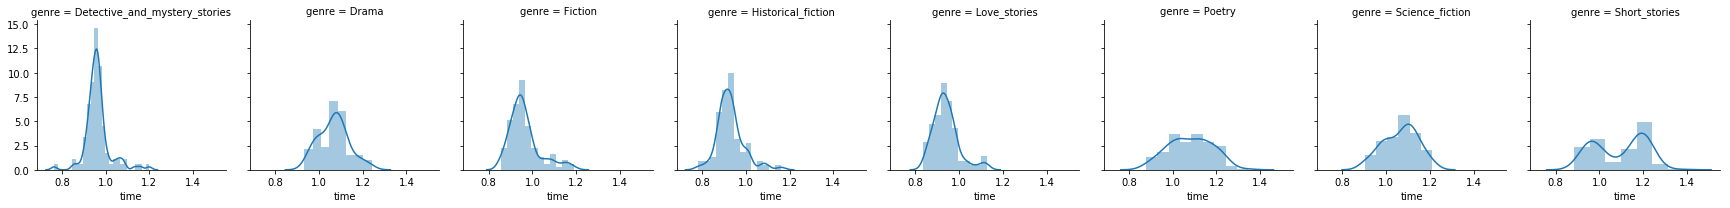

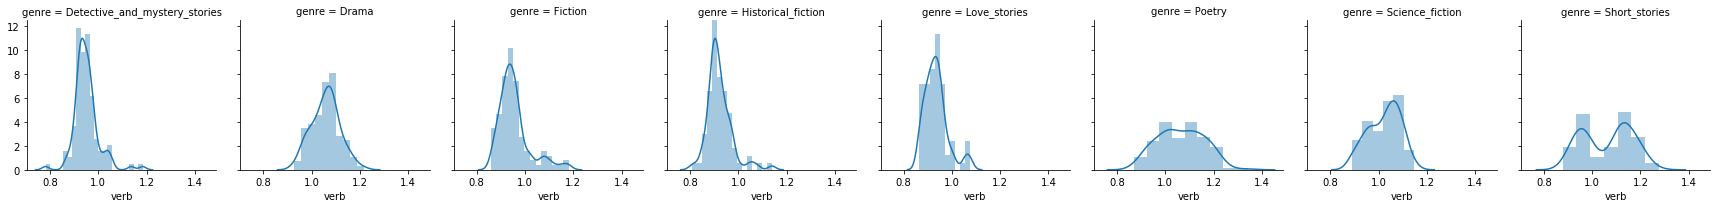

In [28]:
from matplotlib import pyplot as plt 

#fig, axes = plt.subplots(nrows=8, ncols=1, figsize = (20,100))

for i,concept in enumerate(list(association_dict.keys())):
#     print(concept)
    #ax = axes[i]
    g = sns.FacetGrid(df_filtered, col='genre') 
    g = g.map(sns.distplot, concept)
    #ax.set_ylim(0.95,1.15)
    #ax.set_title(g)
    #ax.plot()

#### Plot of distribution of the distance for differnt concept in both outcome

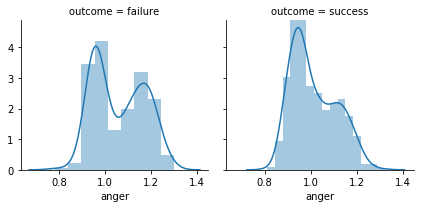

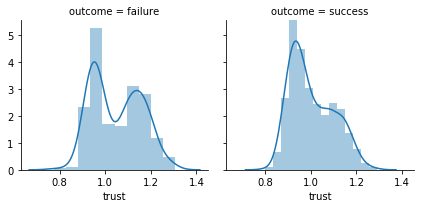

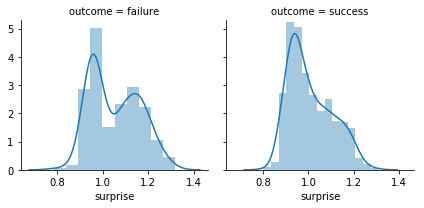

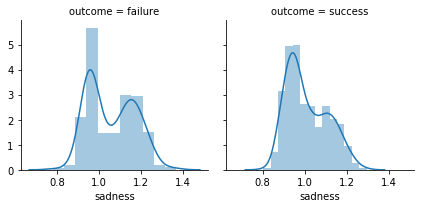

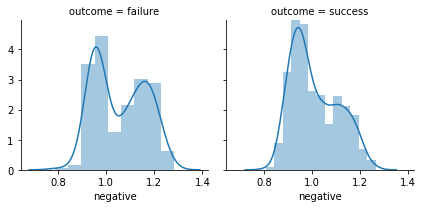

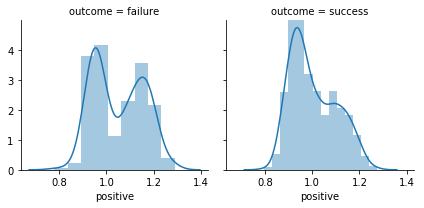

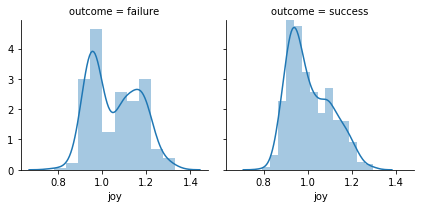

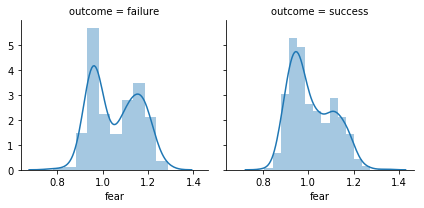

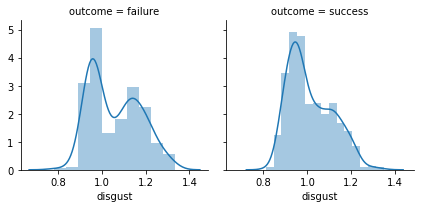

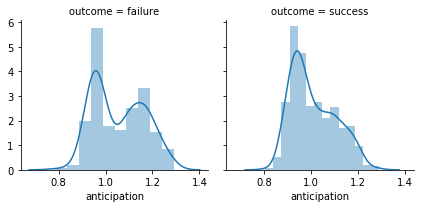

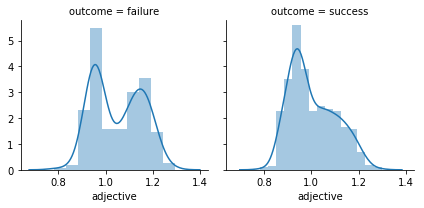

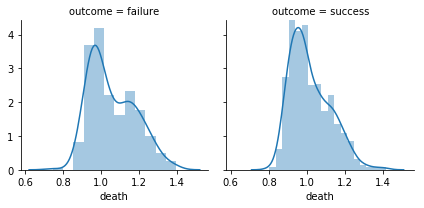

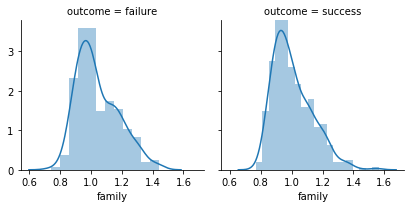

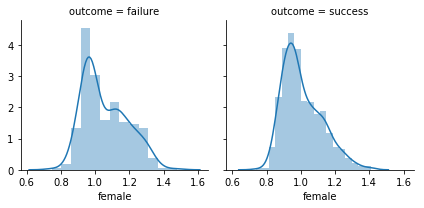

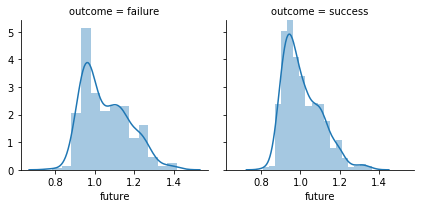

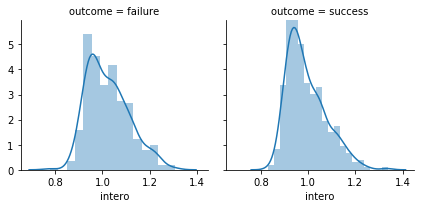

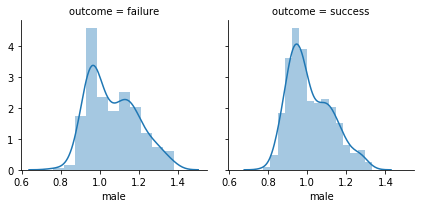

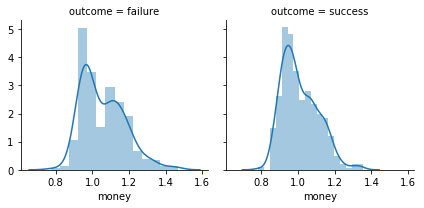

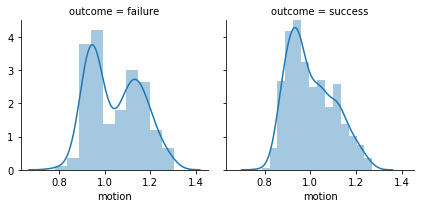

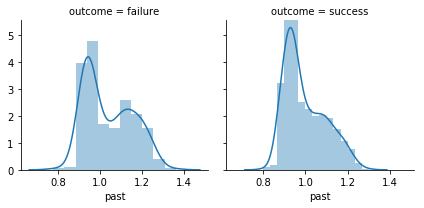

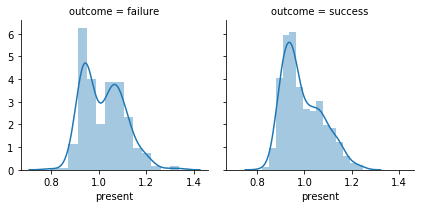

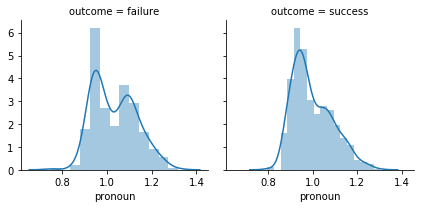

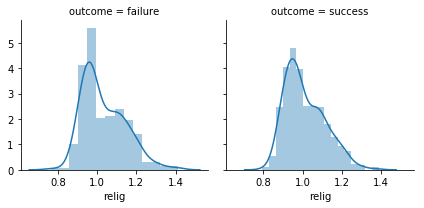

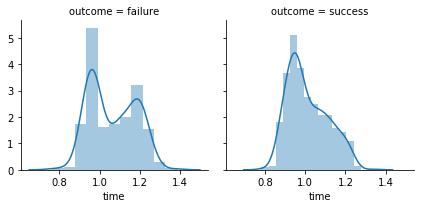

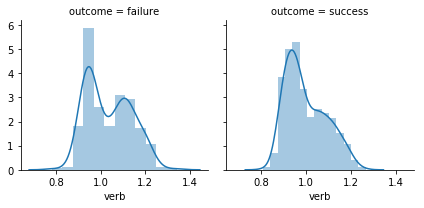

In [29]:
from matplotlib import pyplot as plt 

#fig, axes = plt.subplots(nrows=8, ncols=1, figsize = (20,100))

for i,concept in enumerate(list(association_dict.keys())):
#     print(concept)
    #ax = axes[i]
    g = sns.FacetGrid(df_filtered, col='outcome') 
    g.map(sns.distplot, concept)
    #ax.set_ylim(0.95,1.15)
    #ax.set_title(g)
    #ax.plot()

#### Kolmogorov-Smirnov Test, whether two distribution are differn or not

In [30]:
from scipy import stats

rvs1 = df_filtered[df_filtered.outcome=='success'].dist
rvs2 = df_filtered[df_filtered.outcome=='failure'].dist 

stats.ks_2samp(rvs1, rvs2)[1]

3.405676806106223e-07

#### Kolmogorov-Smirnov Test, for all pair

In [31]:
p_val_pair = {}

for i,g1 in enumerate(df_filtered.genre.unique()):
    for j,g2 in enumerate(df_filtered.genre.unique()):
        rvs1 = df_filtered[df_filtered.genre==g1].family
        rvs2 = df_filtered[df_filtered.genre==g2].family

        p = stats.ks_2samp(rvs1, rvs2)[1]
        print(g1,g2,p)

Detective_and_mystery_stories Detective_and_mystery_stories 1.0
Detective_and_mystery_stories Drama 1.0223710904793133e-13
Detective_and_mystery_stories Fiction 0.08386060142828365
Detective_and_mystery_stories Historical_fiction 1.3245858383600914e-06
Detective_and_mystery_stories Love_stories 4.696470648362925e-05
Detective_and_mystery_stories Poetry 5.666875209681566e-13
Detective_and_mystery_stories Science_fiction 4.841266105623019e-15
Detective_and_mystery_stories Short_stories 1.1439310345052709e-15
Drama Detective_and_mystery_stories 1.0223710904793133e-13
Drama Drama 1.0
Drama Fiction 6.971136797419035e-15
Drama Historical_fiction 2.1483438373619674e-18
Drama Love_stories 1.8700851790136536e-17
Drama Poetry 0.013720001763071204
Drama Science_fiction 0.007424860158503851
Drama Short_stories 3.2079872871217075e-09
Fiction Detective_and_mystery_stories 0.08386060142828365
Fiction Drama 6.971136797419035e-15
Fiction Fiction 1.0
Fiction Historical_fiction 0.0020725225268903276
Fict

In [33]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import Dropout

Using TensorFlow backend.


In [34]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [35]:
df_filtered.describe()

,anger,trust,surprise,sadness,negative,positive,joy,fear,disgust,anticipation,...,male,money,motion,past,present,pronoun,relig,time,verb,dist
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,...,947.000000,923.000000,947.000000,947.000000,947.000000,947.000000,896.000000,947.000000,947.000000,947.000000
mean,1.028933,1.018815,1.022751,1.026502,1.025899,1.019834,1.023040,1.027201,1.028861,1.023972,...,1.031553,1.026009,1.016915,1.011128,1.001435,1.010464,1.018186,1.029429,1.010920,1.015810
std,0.104620,0.102117,0.102986,0.105094,0.102612,0.101996,0.104848,0.100668,0.107729,0.102600,...,0.117979,0.107993,0.106551,0.105840,0.085416,0.093093,0.104683,0.108517,0.095997,0.098950
min,0.780983,0.774470,0.784015,0.779585,0.786146,0.779999,0.779961,0.780874,0.783778,0.783682,...,0.763399,0.775287,0.782380,0.778222,0.794111,0.749457,0.766516,0.764425,0.781833,0.778801
25%,0.944334,0.934435,0.939622,0.942228,0.942605,0.936323,0.938126,0.944710,0.943951,0.940110,...,0.939726,0.942108,0.930056,0.927823,0.933304,0.938339,0.937890,0.943273,0.932815,0.935791
50%,0.998738,0.989622,0.992971,0.995174,0.995648,0.990199,0.992443,0.998712,0.996513,0.993156,...,1.000994,0.999649,0.989308,0.971876,0.977571,0.986149,0.989456,0.999507,0.982503,0.985832
75%,1.120111,1.104477,1.103083,1.115204,1.114106,1.107439,1.103380,1.115155,1.117239,1.106061,...,1.114774,1.098710,1.106658,1.095584,1.065811,1.077432,1.089087,1.117061,1.088911,1.102763
max,1.322436,1.307472,1.319368,1.368076,1.282382,1.288116,1.331910,1.345292,1.348710,1.292717,...,1.378873,1.466564,1.304462,1.361527,1.339325,1.318857,1.411367,1.384388,1.343265,1.288824


In [36]:
df_filtered.describe()

,anger,trust,surprise,sadness,negative,positive,joy,fear,disgust,anticipation,...,male,money,motion,past,present,pronoun,relig,time,verb,dist
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,...,947.000000,923.000000,947.000000,947.000000,947.000000,947.000000,896.000000,947.000000,947.000000,947.000000
mean,1.028933,1.018815,1.022751,1.026502,1.025899,1.019834,1.023040,1.027201,1.028861,1.023972,...,1.031553,1.026009,1.016915,1.011128,1.001435,1.010464,1.018186,1.029429,1.010920,1.015810
std,0.104620,0.102117,0.102986,0.105094,0.102612,0.101996,0.104848,0.100668,0.107729,0.102600,...,0.117979,0.107993,0.106551,0.105840,0.085416,0.093093,0.104683,0.108517,0.095997,0.098950
min,0.780983,0.774470,0.784015,0.779585,0.786146,0.779999,0.779961,0.780874,0.783778,0.783682,...,0.763399,0.775287,0.782380,0.778222,0.794111,0.749457,0.766516,0.764425,0.781833,0.778801
25%,0.944334,0.934435,0.939622,0.942228,0.942605,0.936323,0.938126,0.944710,0.943951,0.940110,...,0.939726,0.942108,0.930056,0.927823,0.933304,0.938339,0.937890,0.943273,0.932815,0.935791
50%,0.998738,0.989622,0.992971,0.995174,0.995648,0.990199,0.992443,0.998712,0.996513,0.993156,...,1.000994,0.999649,0.989308,0.971876,0.977571,0.986149,0.989456,0.999507,0.982503,0.985832
75%,1.120111,1.104477,1.103083,1.115204,1.114106,1.107439,1.103380,1.115155,1.117239,1.106061,...,1.114774,1.098710,1.106658,1.095584,1.065811,1.077432,1.089087,1.117061,1.088911,1.102763
max,1.322436,1.307472,1.319368,1.368076,1.282382,1.288116,1.331910,1.345292,1.348710,1.292717,...,1.378873,1.466564,1.304462,1.361527,1.339325,1.318857,1.411367,1.384388,1.343265,1.288824


In [37]:
 df_filtered.isna().sum()

name             0
genre            0
outcome          0
anger            0
trust            0
surprise         0
sadness          0
negative         0
positive         0
joy              0
fear             0
disgust          0
anticipation     0
adjective        0
death           31
family          85
female          38
future           0
intero           0
male             0
money           24
motion           0
past             0
present          0
pronoun          0
relig           51
time             0
verb             0
dist             0
dtype: int64

In [38]:
df_filtered.head(5)

,name,genre,outcome,anger,trust,surprise,sadness,negative,positive,joy,...,male,money,motion,past,present,pronoun,relig,time,verb,dist
0,10082_the+hampstead+mystery.vec,Detective_and_mystery_stories,failure,0.928524,0.918744,0.929020,0.917572,0.925656,0.918969,0.914599,...,0.939654,0.930497,0.923865,0.914525,0.920689,0.897278,0.890290,0.930880,0.929682,0.918614
1,10083_the+house+of+the+whispering+pines.vec,Detective_and_mystery_stories,failure,0.928995,0.919103,0.913978,0.922291,0.927324,0.916676,0.905140,...,0.972327,0.928902,0.906096,0.909494,0.912471,0.929677,0.895544,0.918517,0.906980,0.914470
2,10371_the+cinema+murder.vec,Detective_and_mystery_stories,failure,0.954635,0.949335,0.965495,0.949954,0.952701,0.955515,0.952161,...,0.962402,0.907652,0.924624,0.936541,0.936847,0.958892,0.968760,0.969123,0.931426,0.947109
3,10534_the+double+traitor.vec,Detective_and_mystery_stories,failure,0.961841,0.961074,0.950450,0.966016,0.967095,0.959137,0.959231,...,0.995888,0.957394,0.984359,0.942735,0.970269,0.995306,0.991014,0.960271,0.970269,0.961499
4,10943_elusive+isabel.vec,Detective_and_mystery_stories,failure,1.028234,0.995729,1.015424,1.012126,1.016306,0.996695,1.000139,...,1.030985,1.014924,1.002031,0.966512,0.978782,0.982749,0.993544,1.013652,0.986591,0.997344


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [40]:
# load dataset
dataframe = df_filtered

In [41]:
print(len(dataframe))
dataframe = dataframe.dropna()
print(len(dataframe))
dataframe = dataframe.values

947
817


In [42]:
print(len(df_book.columns))

29


In [43]:
X = dataframe[:,20:29].astype(float)
Y = dataframe[:,2]

In [44]:
from sklearn.preprocessing import normalize
X = normalize(X, axis=0, norm='max')

### ML Model for the classification task

In [45]:
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical
# encode class values as integers
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
#dummy_y = encoded_Y

In [46]:
dummy_y[-5:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size = 0.3, random_state = 21)

In [48]:
from sklearn import svm
import xgboost

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

0.6626016260162602
Predicted   0    1
Actual            
0          13   61
1          22  150


In [49]:
from sklearn import svm
import xgboost

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred[:2])
print(accuracy_score(y_test, y_pred))

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

[1 0]
0.6341463414634146
Predicted   0    1
Actual            
0          18   56
1          34  138


['failure' 'success']


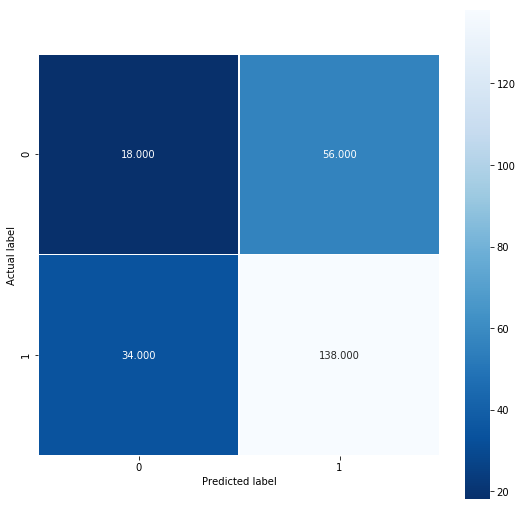

In [50]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(encoder.inverse_transform([0,1]))

In [51]:
df_filtered.columns

Index(['name', 'genre', 'outcome', 'anger', 'trust', 'surprise', 'sadness',
       'negative', 'positive', 'joy', 'fear', 'disgust', 'anticipation',
       'adjective', 'death', 'family', 'female', 'future', 'intero', 'male',
       'money', 'motion', 'past', 'present', 'pronoun', 'relig', 'time',
       'verb', 'dist'],
      dtype='object')

In [52]:
df_filtered = df_filtered.fillna(1.5)

### Calculate the Bias

In [53]:
def generate_order(temp_df):
    temp_order = temp_df[3:29]
    sorted_order = np.argsort(temp_order)
    #print(list(sorted_order))
    return list(sorted_order)

In [54]:
df_filtered['order'] = df_filtered.apply(generate_order, axis=1)

In [55]:
df_filtered[['female', 'future', 'intero', 'male','order']].tail()

,female,future,intero,male,order
998,1.183317,1.139273,1.134849,1.304214,"[11, 20, 22, 18, 15, 14, 7, 17, 24, 21, 25, 3,..."
999,1.270997,1.129176,1.173549,1.332306,"[2, 20, 14, 9, 18, 0, 21, 5, 6, 17, 24, 4, 3, ..."
1000,1.301828,1.147533,1.257250,1.270688,"[22, 14, 6, 2, 17, 0, 9, 5, 1, 23, 7, 10, 25, ..."
1001,1.258351,1.109785,1.057804,1.130931,"[21, 15, 20, 14, 24, 16, 25, 18, 2, 23, 1, 9, ..."
1002,1.064550,1.131522,1.124754,1.182446,"[12, 13, 11, 21, 17, 18, 15, 20, 14, 22, 7, 3,..."


In [56]:
def find_position(row):
    global active_index
    ind = row.index(active_index)
    return ind

In [57]:
CONCEPTS = ['anger', 'trust', 'surprise', 'sadness',
           'negative', 'positive', 'joy', 'fear', 'disgust', 'anticipation',
           'adjective', 'death', 'family', 'female', 'future', 'intero', 'male',
           'money', 'motion', 'past', 'present', 'pronoun', 'relig', 'time', 'verb']
len(CONCEPTS)

25

In [58]:
for i, c in enumerate(CONCEPTS):
    c = c+'_pos'
    global active_index
    active_index = i
    df_filtered[c] = df_filtered.order.apply(find_position)

In [59]:
df_filtered.male_pos.head()

0    25
1    24
2    19
3    23
4    23
Name: male_pos, dtype: int64

### Plot of the Bias distribution of the all genres

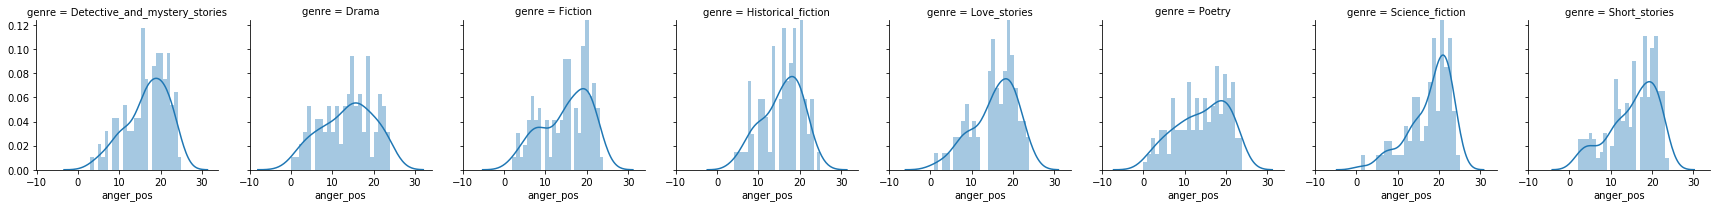

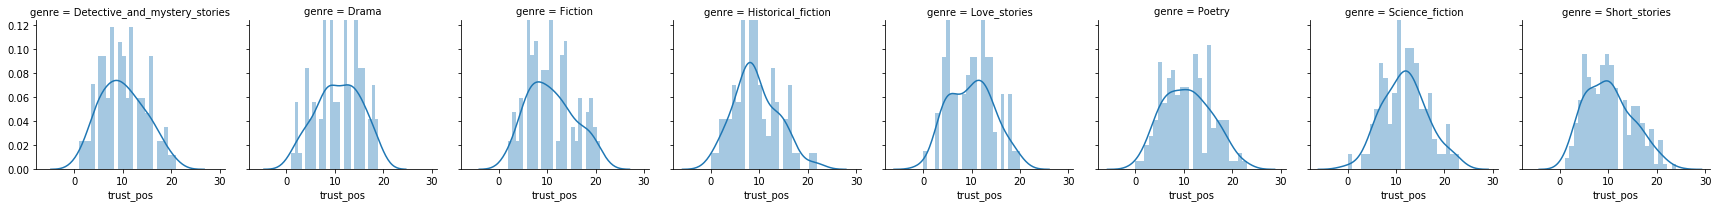

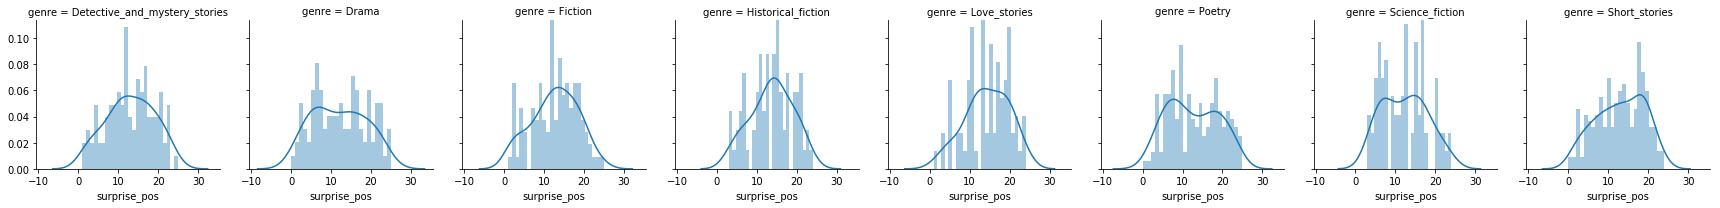

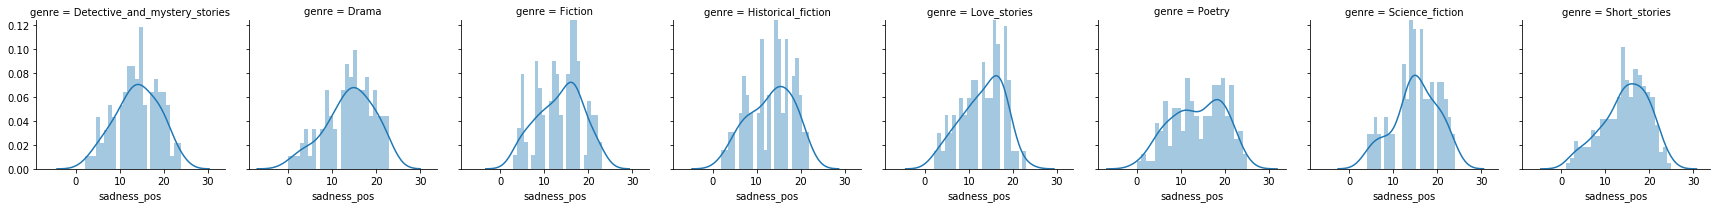

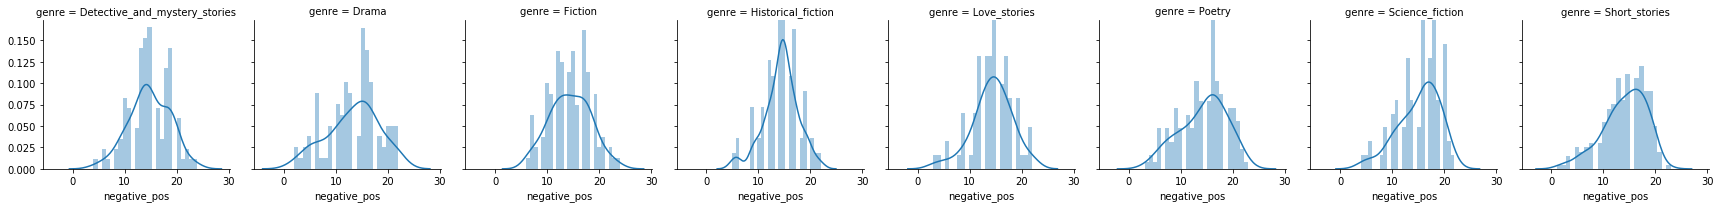

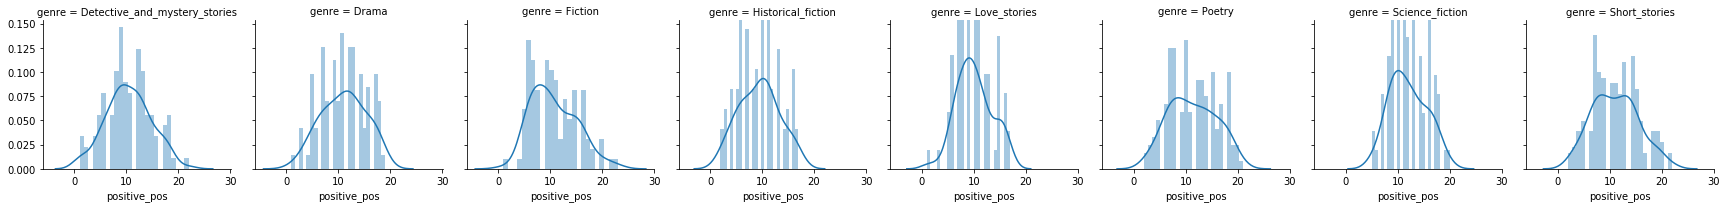

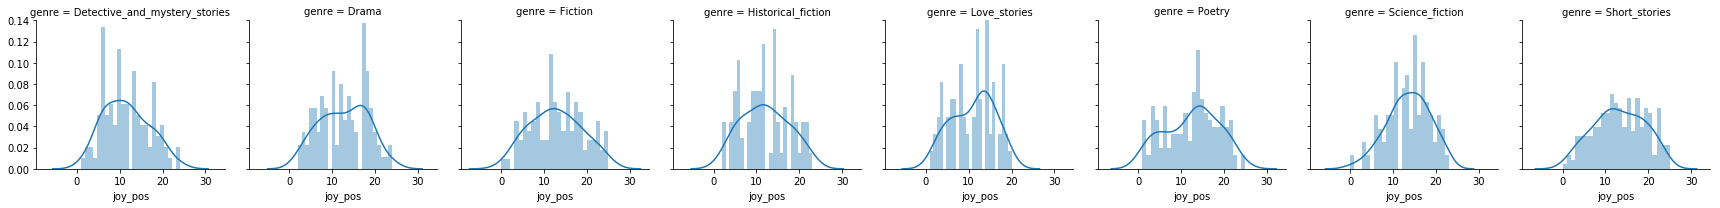

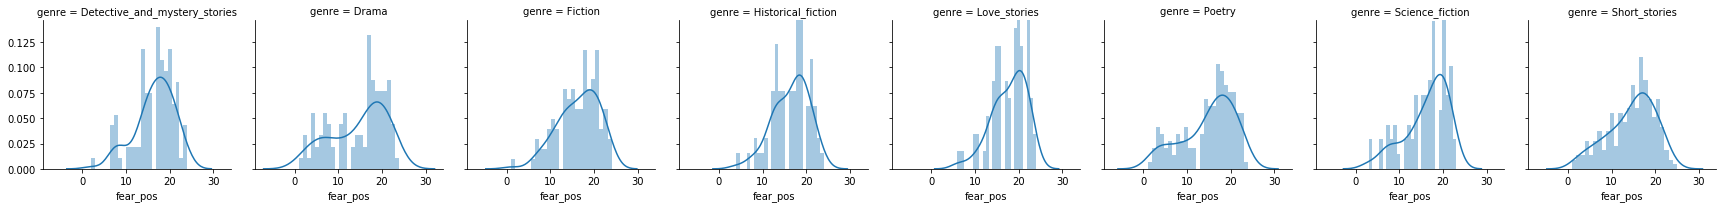

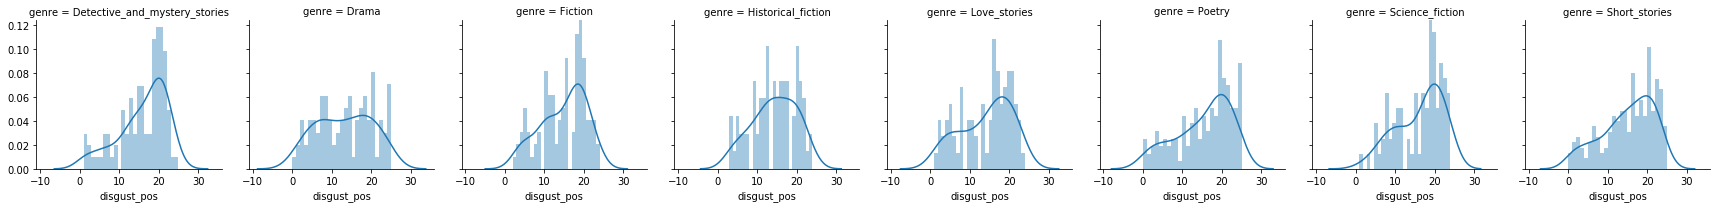

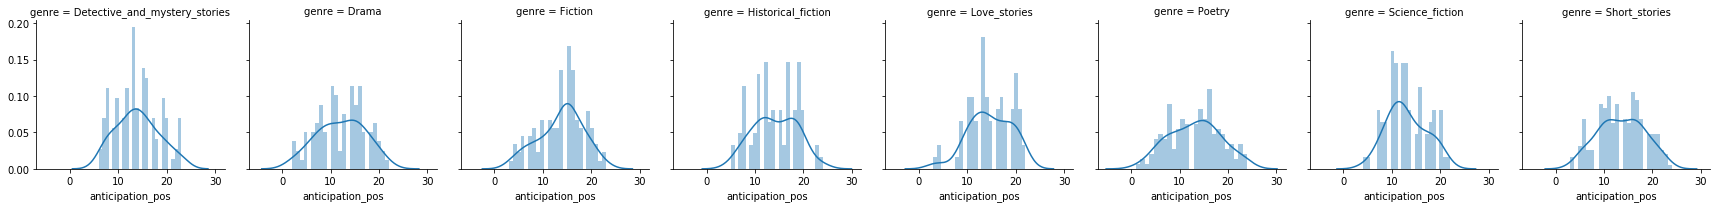

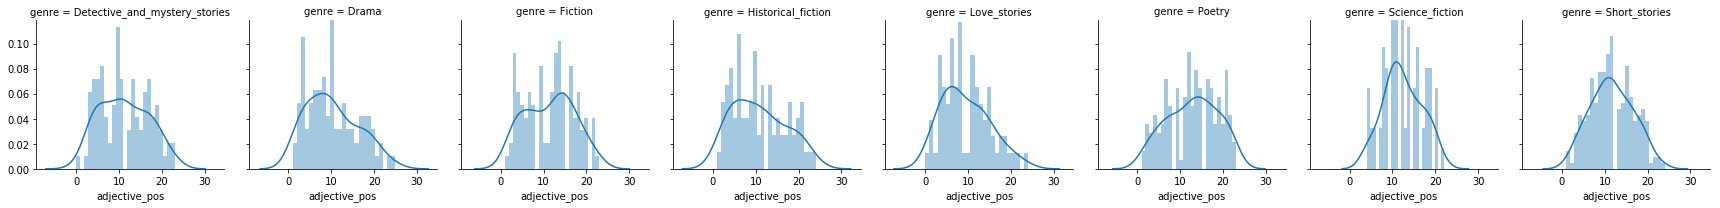

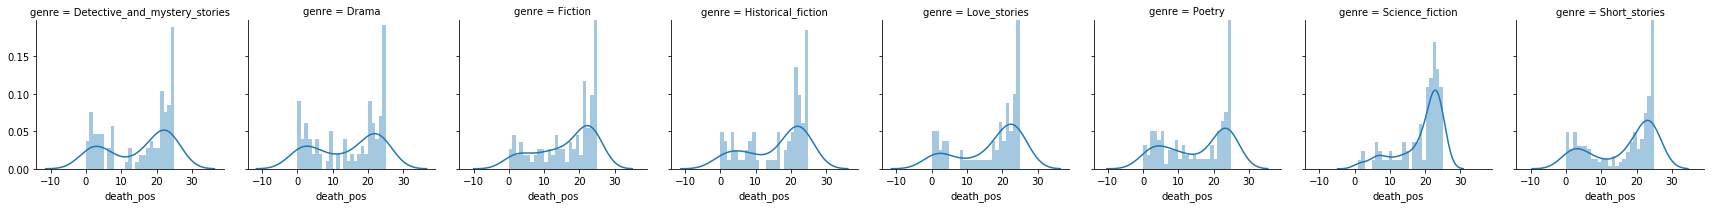

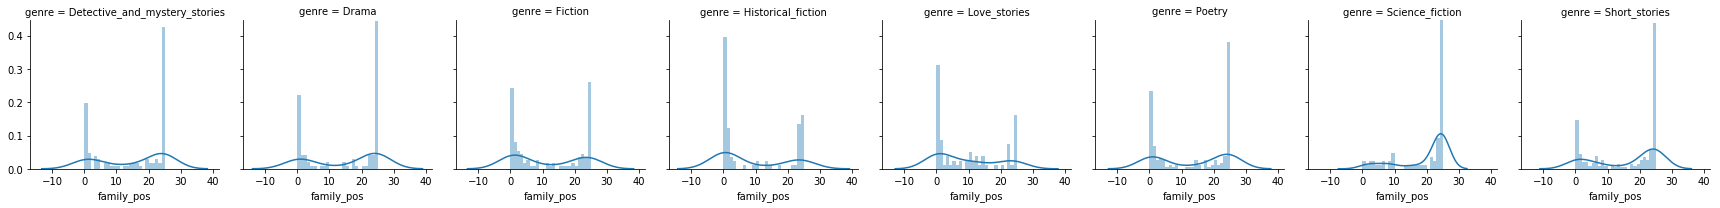

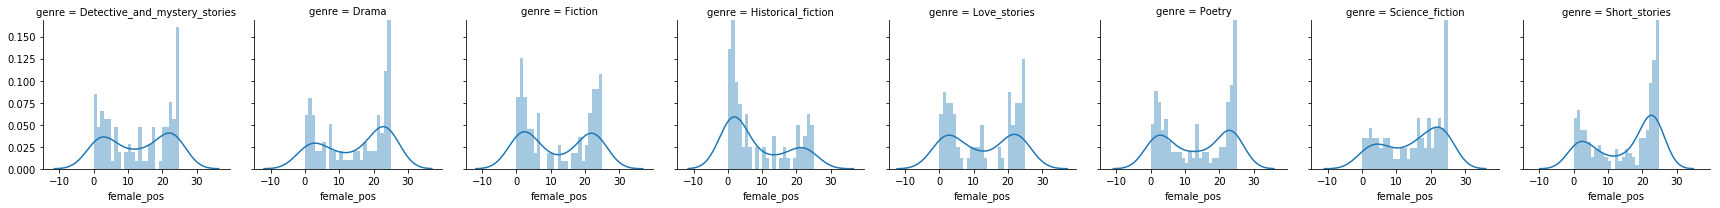

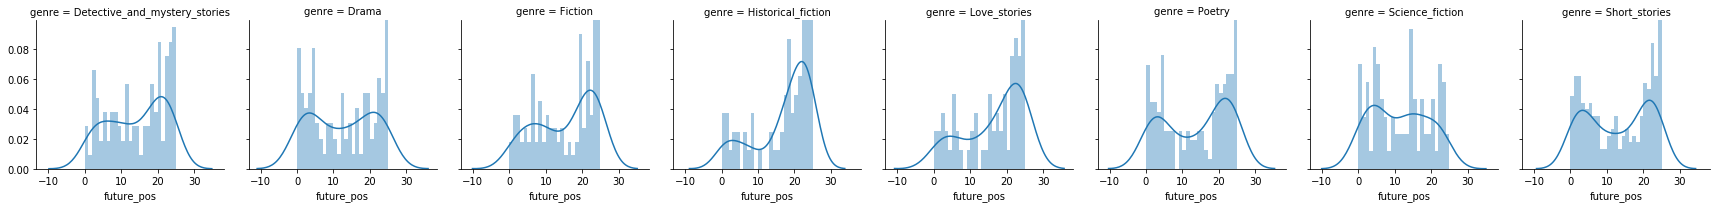

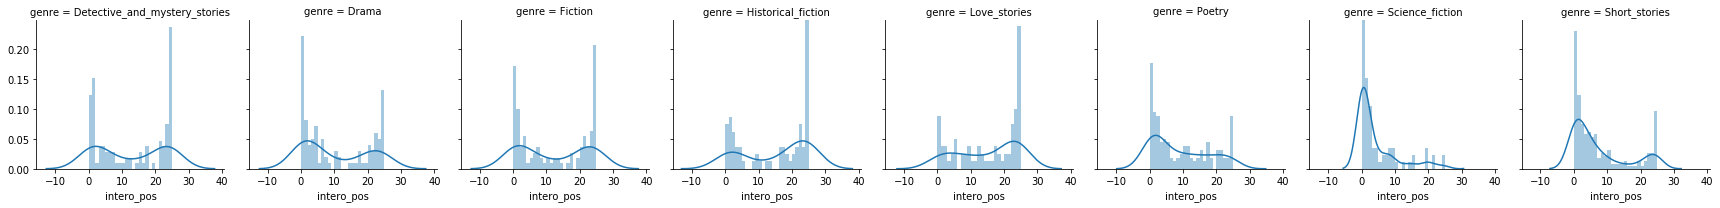

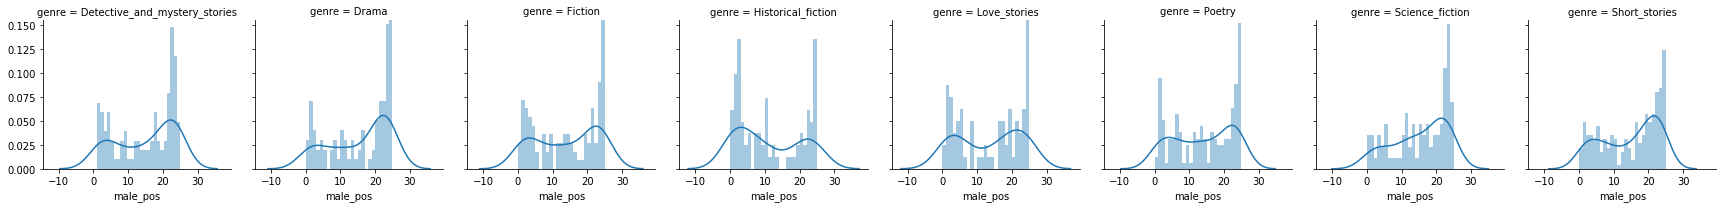

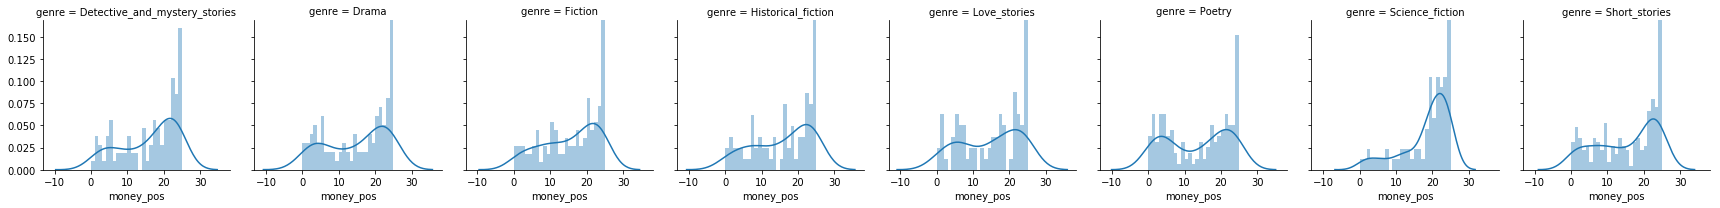

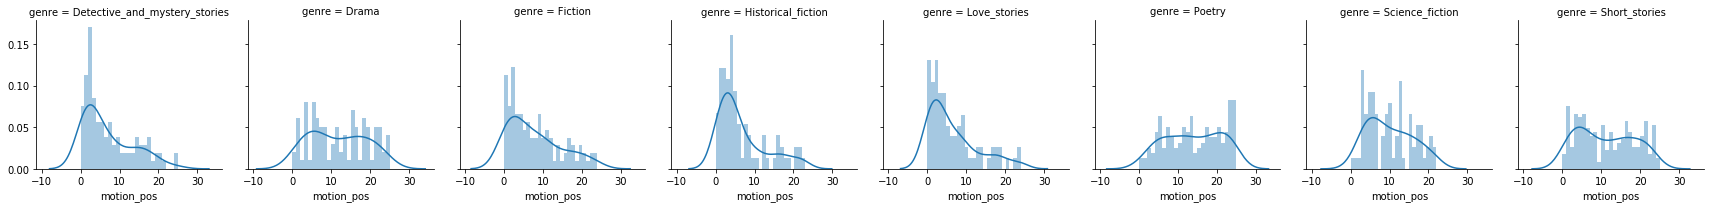

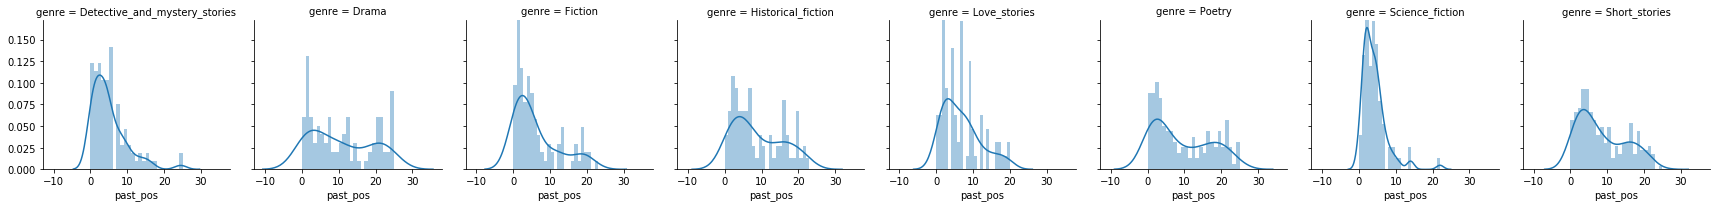

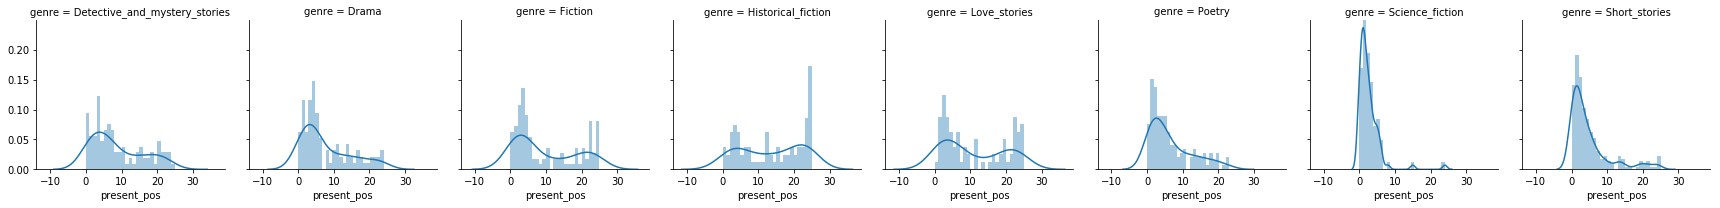

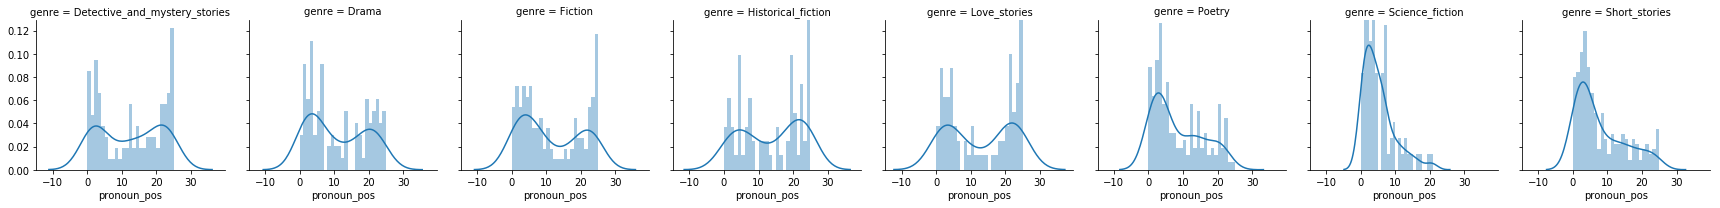

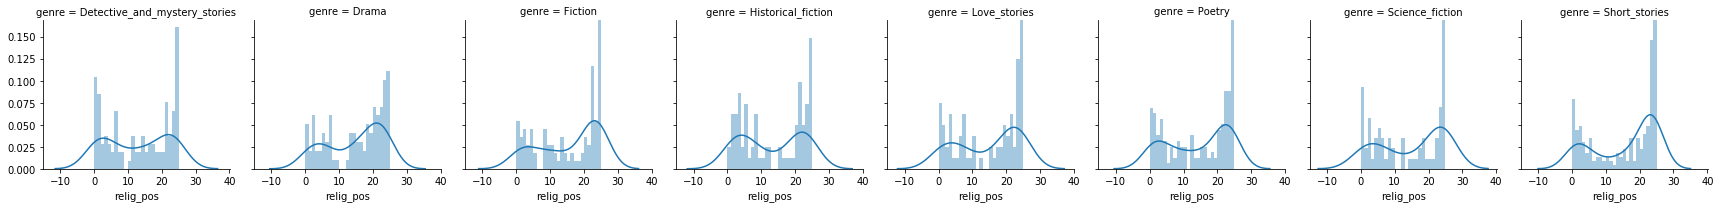

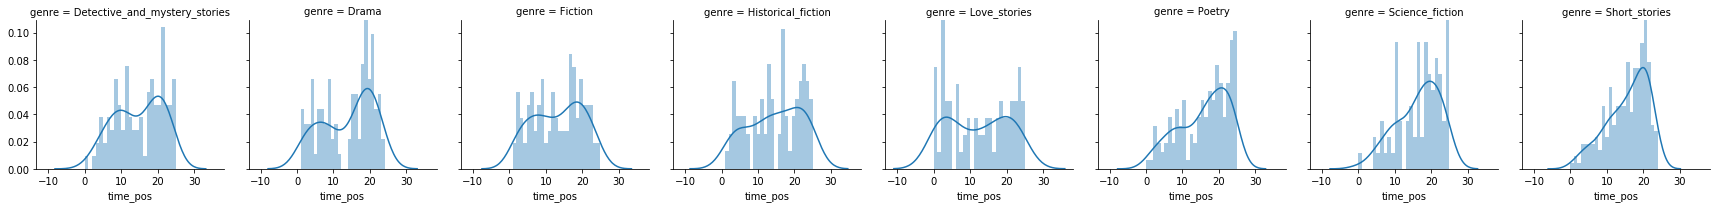

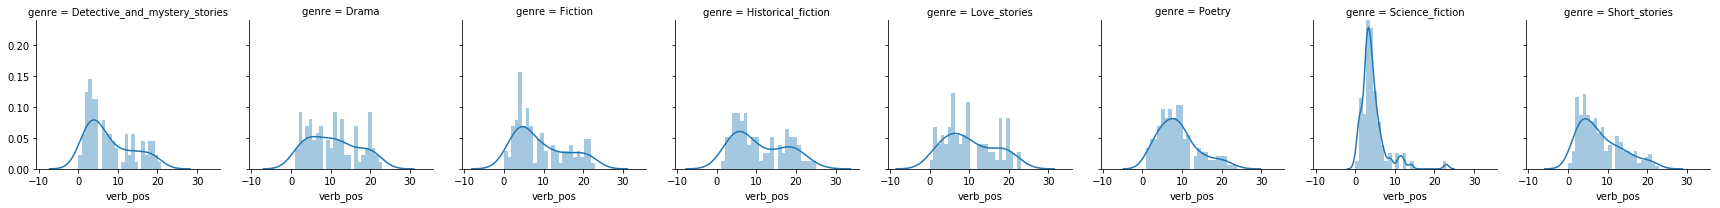

In [60]:
from matplotlib import pyplot as plt 

#fig, axes = plt.subplots(nrows=8, ncols=1, figsize = (20,100))

for i, c in enumerate(CONCEPTS):
    c = c +'_pos'
#     print(concept)
    #ax = axes[i]
    g = sns.FacetGrid(df_filtered, col='genre') 
    g = g.map(sns.distplot, c, bins=25)
    #ax.set_ylim(0.95,1.15)
    #ax.set_title(g)
    #ax.plot()

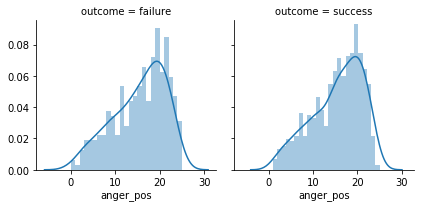

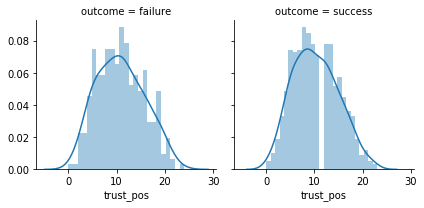

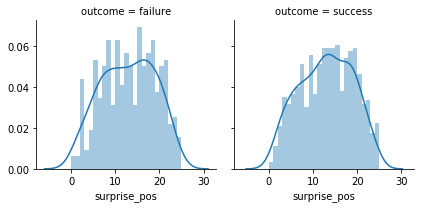

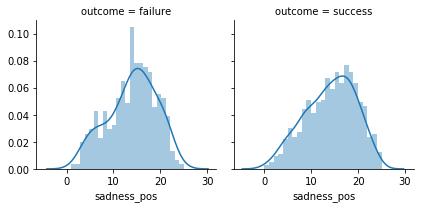

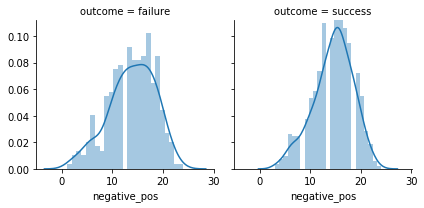

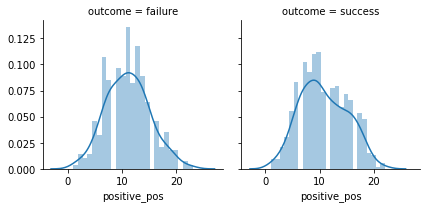

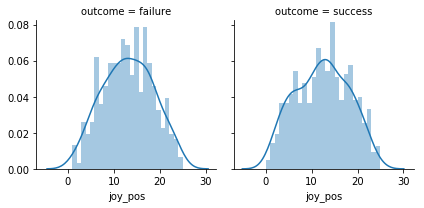

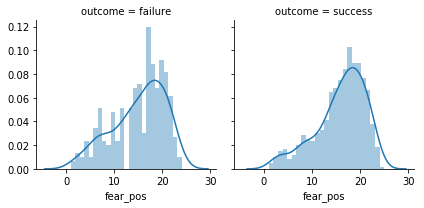

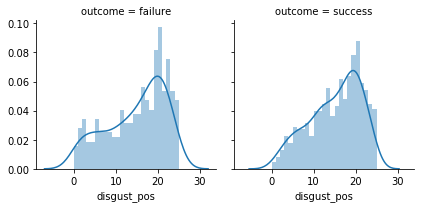

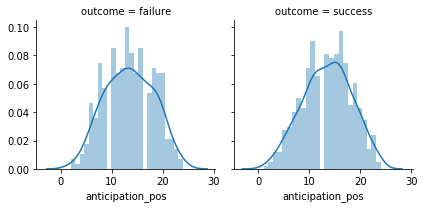

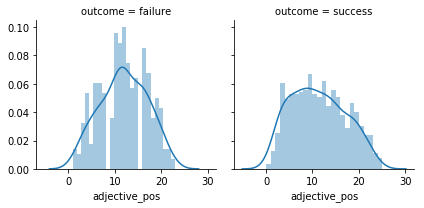

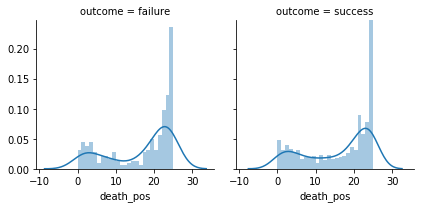

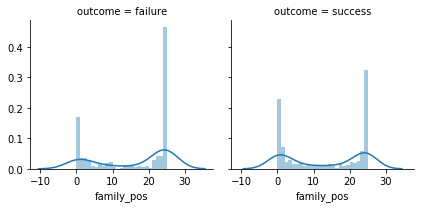

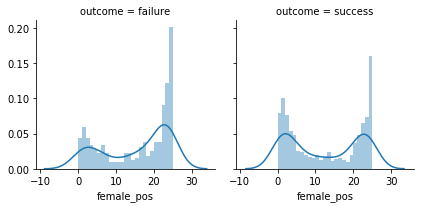

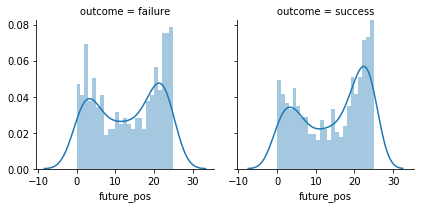

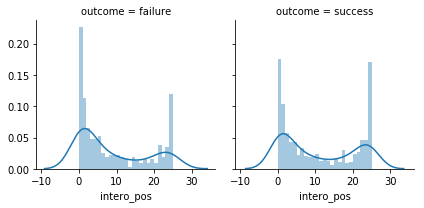

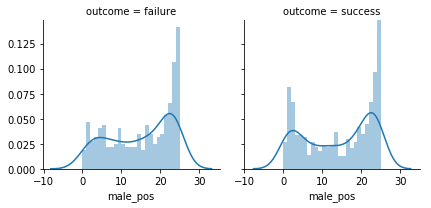

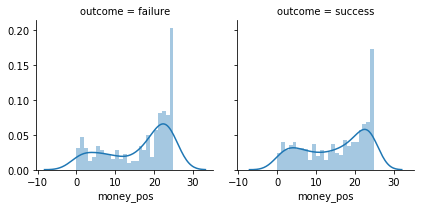

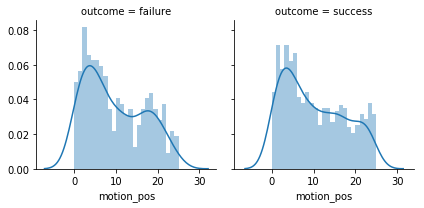

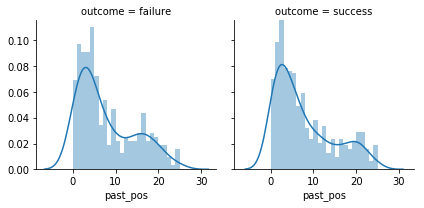

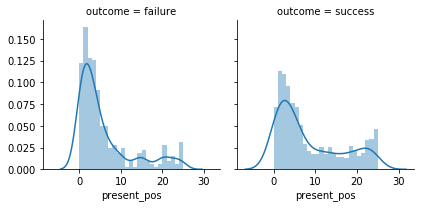

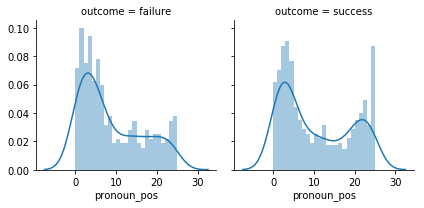

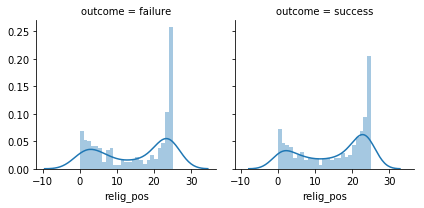

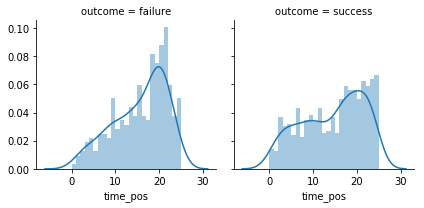

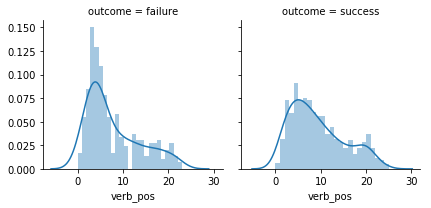

In [61]:
from matplotlib import pyplot as plt 

#fig, axes = plt.subplots(nrows=8, ncols=1, figsize = (20,100))

for i, c in enumerate(CONCEPTS):
    c = c +'_pos'
#     print(concept)
    #ax = axes[i]
    g = sns.FacetGrid(df_filtered, col='outcome') 
    g = g.map(sns.distplot, c, bins=25)
    #ax.set_ylim(0.95,1.15)
    #ax.set_title(g)
    #ax.plot()

In [65]:
df_filtered.head()

,name,genre,outcome,anger,trust,surprise,sadness,negative,positive,joy,...,intero_pos,male_pos,money_pos,motion_pos,past_pos,present_pos,pronoun_pos,relig_pos,time_pos,verb_pos
0,10082_the+hampstead+mystery.vec,Detective_and_mystery_stories,failure,0.928524,0.918744,0.929020,0.917572,0.925656,0.918969,0.914599,...,1,25,22,14,5,12,2,0,23,21
1,10083_the+house+of+the+whispering+pines.vec,Detective_and_mystery_stories,failure,0.928995,0.919103,0.913978,0.922291,0.927324,0.916676,0.905140,...,23,24,17,2,5,6,19,0,12,3
2,10371_the+cinema+murder.vec,Detective_and_mystery_stories,failure,0.954635,0.949335,0.965495,0.949954,0.952701,0.955515,0.952161,...,21,19,1,2,5,6,18,24,25,4
3,10534_the+double+traitor.vec,Detective_and_mystery_stories,failure,0.961841,0.961074,0.950450,0.966016,0.967095,0.959137,0.959231,...,3,23,4,20,0,15,22,21,8,16
4,10943_elusive+isabel.vec,Detective_and_mystery_stories,failure,1.028234,0.995729,1.015424,1.012126,1.016306,0.996695,1.000139,...,1,23,16,11,0,2,4,6,15,5


In [78]:
# load dataset
dataframe = df_filtered

In [100]:
len(df_filtered.columns)

55

In [79]:
print(len(dataframe))
dataframe = dataframe.dropna()
print(len(dataframe))
dataframe = dataframe.values

947
947


In [133]:
X = dataframe[:,30:48].astype(float)
Y = dataframe[:,2]

#### New classifier with Bias as features

In [134]:
from sklearn.preprocessing import normalize
X = normalize(X, axis=0, norm='max')

encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size = 0.3, random_state = 21)

In [135]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

0.6701754385964912
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Predicted   0    1
Actual            
0          21   83
1          11  170


### Save the model

In [136]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [137]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6701754385964912


#### MLP model for the classificaiton  

In [111]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=25, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=5, batch_size=128, verbose=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/5
852/852 [==============================] - ETA: 1s - loss: 0.6716 - acc: 0.625 - 0s 317us/step - loss: 0.6495 - acc: 0.6420
Epoch 2/5
852/852 [==============================] - ETA: 0s - loss: 0.6150 - acc: 0.695 - 0s 13us/step - loss: 0.6306 - acc: 0.6620
Epoch 3/5
852/852 [==============================] - ETA: 0s - loss: 0.6174 - acc: 0.664 - 0s 9us/step - loss: 0.6257 - acc: 0.6620
Epoch 4/5
852/852 [==============================] - ETA: 0s - loss: 0.6395 - acc: 0.640 - 0s 20us/step - loss: 0.6207 - acc: 0.6631
Epoch 5/5
95/95 [==============================] - 0s 315us/step
Epoch 1/5
852/852 [==============================] - ETA: 1s - loss: 0.6915 - acc: 0.515 - 0s 291us/step - loss: 0.6675 - acc: 0.5915
Epoch 2/5
852/852 [==============================] - ETA: 0s - loss: 0.6532 - acc: 0.640 - 0s 16us/step - loss: 0.6304 - acc: 0.6643
Epoch 3/5
852/852 [==============================] - ETA: 0s - loss: 0.6255 - acc: 0.664 - 0s 12us/step - loss: 0.6316 - acc: 0.6643
Epo

In [115]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.25, random_state = 21)

history = model.fit(X_train, y_train, nb_epoch=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

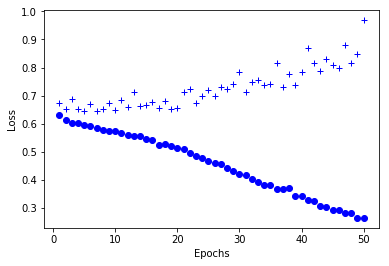

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline  

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

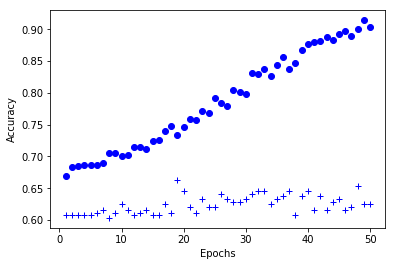

In [117]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [119]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, nb_epoch=9, batch_size=512, validation_data=(X_test, y_test))

results = model.evaluate(X_test, y_test)

Train on 710 samples, validate on 237 samples
Epoch 1/9
710/710 [==============================] - ETA: 0s - loss: 0.7620 - acc: 0.345 - 0s 680us/step - loss: 0.7520 - acc: 0.3648 - val_loss: 0.7004 - val_acc: 0.4726
Epoch 2/9
710/710 [==============================] - ETA: 0s - loss: 0.7111 - acc: 0.453 - 0s 13us/step - loss: 0.7079 - acc: 0.4676 - val_loss: 0.6824 - val_acc: 0.5654
Epoch 3/9
710/710 [==============================] - ETA: 0s - loss: 0.6823 - acc: 0.562 - 0s 18us/step - loss: 0.6745 - acc: 0.5831 - val_loss: 0.6720 - val_acc: 0.6034
Epoch 4/9
710/710 [==============================] - ETA: 0s - loss: 0.6562 - acc: 0.652 - 0s 13us/step - loss: 0.6516 - acc: 0.6634 - val_loss: 0.6691 - val_acc: 0.6076
Epoch 5/9
710/710 [==============================] - ETA: 0s - loss: 0.6412 - acc: 0.675 - 0s 14us/step - loss: 0.6378 - acc: 0.6789 - val_loss: 0.6732 - val_acc: 0.6076
Epoch 6/9
710/710 [==============================] - ETA: 0s - loss: 0.6313 - acc: 0.681 - 0s 13us/step

In [120]:
results

[0.7019759642926953, 0.607594938217839]